# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

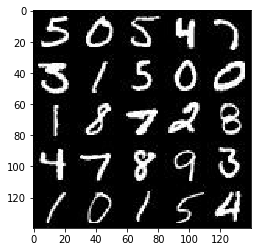

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

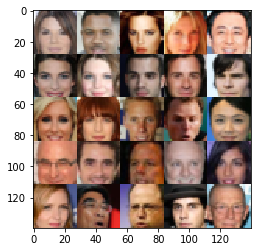

In [3]:

show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))




## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed



### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

    
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)



Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the lo
ss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 0.2719... Generator Loss: 1.6796
Epoch 1/2... Batch 20... Discriminator Loss: 0.1821... Generator Loss: 2.1954
Epoch 1/2... Batch 30... Discriminator Loss: 0.0181... Generator Loss: 6.1200
Epoch 1/2... Batch 40... Discriminator Loss: 0.0237... Generator Loss: 5.2465
Epoch 1/2... Batch 50... Discriminator Loss: 0.2262... Generator Loss: 1.7704
Epoch 1/2... Batch 60... Discriminator Loss: 0.2105... Generator Loss: 1.8747
Epoch 1/2... Batch 70... Discriminator Loss: 0.1068... Generator Loss: 12.5871
Epoch 1/2... Batch 80... Discriminator Loss: 0.1623... Generator Loss: 2.2517
Epoch 1/2... Batch 90... Discriminator Loss: 0.3821... Generator Loss: 2.2160
Epoch 1/2... Batch 100... Discriminator Loss: 0.3192... Generator Loss: 2.6240


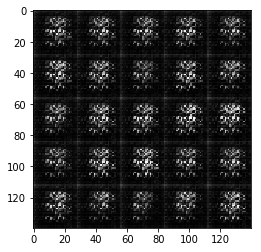

Epoch 1/2... Batch 110... Discriminator Loss: 0.2528... Generator Loss: 2.6554
Epoch 1/2... Batch 120... Discriminator Loss: 0.3774... Generator Loss: 5.1414
Epoch 1/2... Batch 130... Discriminator Loss: 0.7617... Generator Loss: 0.9765
Epoch 1/2... Batch 140... Discriminator Loss: 0.3477... Generator Loss: 1.7954
Epoch 1/2... Batch 150... Discriminator Loss: 0.1307... Generator Loss: 2.7152
Epoch 1/2... Batch 160... Discriminator Loss: 0.2248... Generator Loss: 2.4641
Epoch 1/2... Batch 170... Discriminator Loss: 0.2531... Generator Loss: 2.3505
Epoch 1/2... Batch 180... Discriminator Loss: 0.3127... Generator Loss: 1.8603
Epoch 1/2... Batch 190... Discriminator Loss: 0.2011... Generator Loss: 2.5537
Epoch 1/2... Batch 200... Discriminator Loss: 0.2006... Generator Loss: 3.5183


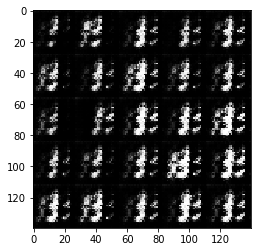

Epoch 1/2... Batch 210... Discriminator Loss: 0.1404... Generator Loss: 3.1186
Epoch 1/2... Batch 220... Discriminator Loss: 0.1519... Generator Loss: 2.5362
Epoch 1/2... Batch 230... Discriminator Loss: 0.1289... Generator Loss: 3.1923
Epoch 1/2... Batch 240... Discriminator Loss: 0.2214... Generator Loss: 2.7303
Epoch 1/2... Batch 250... Discriminator Loss: 0.2028... Generator Loss: 4.2531
Epoch 1/2... Batch 260... Discriminator Loss: 0.0347... Generator Loss: 5.7882
Epoch 1/2... Batch 270... Discriminator Loss: 0.1158... Generator Loss: 3.0140
Epoch 1/2... Batch 280... Discriminator Loss: 0.1121... Generator Loss: 3.0816
Epoch 1/2... Batch 290... Discriminator Loss: 0.0963... Generator Loss: 3.6766
Epoch 1/2... Batch 300... Discriminator Loss: 0.1018... Generator Loss: 3.1417


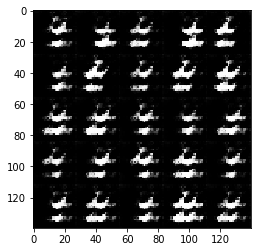

Epoch 1/2... Batch 310... Discriminator Loss: 0.1080... Generator Loss: 6.8089
Epoch 1/2... Batch 320... Discriminator Loss: 0.2096... Generator Loss: 2.0518
Epoch 1/2... Batch 330... Discriminator Loss: 0.1860... Generator Loss: 2.2237
Epoch 1/2... Batch 340... Discriminator Loss: 0.2156... Generator Loss: 2.2420
Epoch 1/2... Batch 350... Discriminator Loss: 0.1762... Generator Loss: 5.2296
Epoch 1/2... Batch 360... Discriminator Loss: 0.4661... Generator Loss: 2.1751
Epoch 1/2... Batch 370... Discriminator Loss: 0.1569... Generator Loss: 4.7203
Epoch 1/2... Batch 380... Discriminator Loss: 0.8048... Generator Loss: 1.2129
Epoch 1/2... Batch 390... Discriminator Loss: 0.2948... Generator Loss: 6.9679
Epoch 1/2... Batch 400... Discriminator Loss: 0.2954... Generator Loss: 2.4848


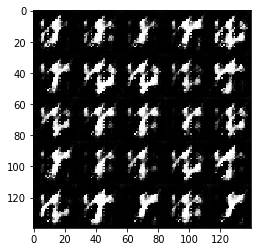

Epoch 1/2... Batch 410... Discriminator Loss: 0.2002... Generator Loss: 2.6276
Epoch 1/2... Batch 420... Discriminator Loss: 0.0743... Generator Loss: 3.5636
Epoch 1/2... Batch 430... Discriminator Loss: 0.3129... Generator Loss: 2.0000
Epoch 1/2... Batch 440... Discriminator Loss: 0.1810... Generator Loss: 3.8295
Epoch 1/2... Batch 450... Discriminator Loss: 0.7002... Generator Loss: 1.6921
Epoch 1/2... Batch 460... Discriminator Loss: 0.1121... Generator Loss: 2.8664
Epoch 1/2... Batch 470... Discriminator Loss: 0.3378... Generator Loss: 2.4967
Epoch 1/2... Batch 480... Discriminator Loss: 0.1376... Generator Loss: 3.7654
Epoch 1/2... Batch 490... Discriminator Loss: 0.1255... Generator Loss: 4.4691
Epoch 1/2... Batch 500... Discriminator Loss: 0.3422... Generator Loss: 2.7364


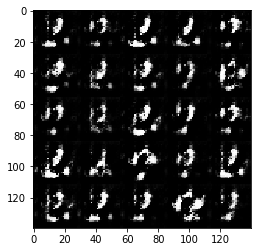

Epoch 1/2... Batch 510... Discriminator Loss: 0.3017... Generator Loss: 4.6931
Epoch 1/2... Batch 520... Discriminator Loss: 0.5420... Generator Loss: 1.6203
Epoch 1/2... Batch 530... Discriminator Loss: 0.3091... Generator Loss: 1.9637
Epoch 1/2... Batch 540... Discriminator Loss: 0.3474... Generator Loss: 2.0505
Epoch 1/2... Batch 550... Discriminator Loss: 0.2866... Generator Loss: 4.0659
Epoch 1/2... Batch 560... Discriminator Loss: 0.4606... Generator Loss: 1.4198
Epoch 1/2... Batch 570... Discriminator Loss: 0.2534... Generator Loss: 3.2763
Epoch 1/2... Batch 580... Discriminator Loss: 0.2976... Generator Loss: 3.1177
Epoch 1/2... Batch 590... Discriminator Loss: 0.3123... Generator Loss: 2.9420
Epoch 1/2... Batch 600... Discriminator Loss: 0.5399... Generator Loss: 2.4677


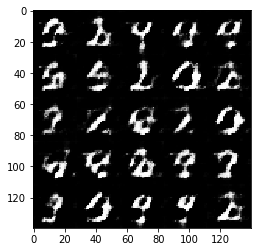

Epoch 1/2... Batch 610... Discriminator Loss: 0.5018... Generator Loss: 1.6669
Epoch 1/2... Batch 620... Discriminator Loss: 0.4821... Generator Loss: 2.6486
Epoch 1/2... Batch 630... Discriminator Loss: 0.5116... Generator Loss: 1.6479
Epoch 1/2... Batch 640... Discriminator Loss: 0.4188... Generator Loss: 2.4351
Epoch 1/2... Batch 650... Discriminator Loss: 0.7618... Generator Loss: 1.0470
Epoch 1/2... Batch 660... Discriminator Loss: 0.5873... Generator Loss: 1.4827
Epoch 1/2... Batch 670... Discriminator Loss: 0.4045... Generator Loss: 2.8636
Epoch 1/2... Batch 680... Discriminator Loss: 0.3332... Generator Loss: 2.0478
Epoch 1/2... Batch 690... Discriminator Loss: 0.5662... Generator Loss: 1.6123
Epoch 1/2... Batch 700... Discriminator Loss: 0.3431... Generator Loss: 2.3074


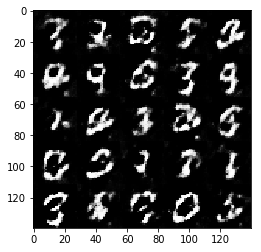

Epoch 1/2... Batch 710... Discriminator Loss: 0.5778... Generator Loss: 2.9973
Epoch 1/2... Batch 720... Discriminator Loss: 0.6525... Generator Loss: 1.5318
Epoch 1/2... Batch 730... Discriminator Loss: 0.5576... Generator Loss: 1.3074
Epoch 1/2... Batch 740... Discriminator Loss: 0.5539... Generator Loss: 3.9337
Epoch 1/2... Batch 750... Discriminator Loss: 0.7431... Generator Loss: 1.3005
Epoch 1/2... Batch 760... Discriminator Loss: 0.4585... Generator Loss: 2.0172
Epoch 1/2... Batch 770... Discriminator Loss: 0.5883... Generator Loss: 1.7040
Epoch 1/2... Batch 780... Discriminator Loss: 0.5490... Generator Loss: 1.6170
Epoch 1/2... Batch 790... Discriminator Loss: 0.5156... Generator Loss: 1.6573
Epoch 1/2... Batch 800... Discriminator Loss: 0.7192... Generator Loss: 1.0482


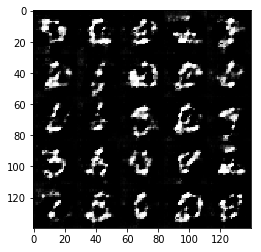

Epoch 1/2... Batch 810... Discriminator Loss: 0.3654... Generator Loss: 2.6091
Epoch 1/2... Batch 820... Discriminator Loss: 0.5281... Generator Loss: 1.4727
Epoch 1/2... Batch 830... Discriminator Loss: 0.9953... Generator Loss: 1.0682
Epoch 1/2... Batch 840... Discriminator Loss: 0.5370... Generator Loss: 1.7909
Epoch 1/2... Batch 850... Discriminator Loss: 0.4664... Generator Loss: 2.4115
Epoch 1/2... Batch 860... Discriminator Loss: 0.4457... Generator Loss: 2.0352
Epoch 1/2... Batch 870... Discriminator Loss: 0.8570... Generator Loss: 3.9938
Epoch 1/2... Batch 880... Discriminator Loss: 0.5002... Generator Loss: 1.7731
Epoch 1/2... Batch 890... Discriminator Loss: 0.5496... Generator Loss: 1.6237
Epoch 1/2... Batch 900... Discriminator Loss: 0.6241... Generator Loss: 2.8694


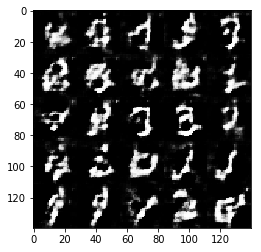

Epoch 1/2... Batch 910... Discriminator Loss: 0.3931... Generator Loss: 2.1368
Epoch 1/2... Batch 920... Discriminator Loss: 0.8105... Generator Loss: 0.9823
Epoch 1/2... Batch 930... Discriminator Loss: 0.4217... Generator Loss: 1.5681
Epoch 1/2... Batch 940... Discriminator Loss: 0.5676... Generator Loss: 3.1252
Epoch 1/2... Batch 950... Discriminator Loss: 0.7850... Generator Loss: 1.2887
Epoch 1/2... Batch 960... Discriminator Loss: 0.3920... Generator Loss: 2.0026
Epoch 1/2... Batch 970... Discriminator Loss: 0.5715... Generator Loss: 1.5387
Epoch 1/2... Batch 980... Discriminator Loss: 0.4506... Generator Loss: 1.7276
Epoch 1/2... Batch 990... Discriminator Loss: 0.7508... Generator Loss: 0.9715
Epoch 1/2... Batch 1000... Discriminator Loss: 0.8298... Generator Loss: 3.5046


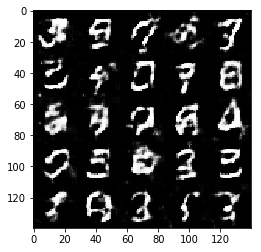

Epoch 1/2... Batch 1010... Discriminator Loss: 1.0187... Generator Loss: 2.8856
Epoch 1/2... Batch 1020... Discriminator Loss: 0.5227... Generator Loss: 2.1817
Epoch 1/2... Batch 1030... Discriminator Loss: 0.4724... Generator Loss: 2.2303
Epoch 1/2... Batch 1040... Discriminator Loss: 0.4290... Generator Loss: 1.9234
Epoch 1/2... Batch 1050... Discriminator Loss: 1.0504... Generator Loss: 0.7502
Epoch 1/2... Batch 1060... Discriminator Loss: 0.5877... Generator Loss: 2.0202
Epoch 1/2... Batch 1070... Discriminator Loss: 1.0072... Generator Loss: 2.3490
Epoch 1/2... Batch 1080... Discriminator Loss: 0.7437... Generator Loss: 0.9627
Epoch 1/2... Batch 1090... Discriminator Loss: 0.6536... Generator Loss: 1.1727
Epoch 1/2... Batch 1100... Discriminator Loss: 0.4585... Generator Loss: 1.7233


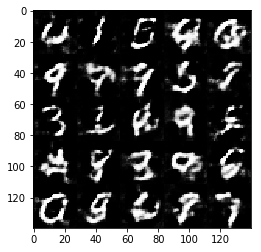

Epoch 1/2... Batch 1110... Discriminator Loss: 0.4139... Generator Loss: 2.0909
Epoch 1/2... Batch 1120... Discriminator Loss: 0.4128... Generator Loss: 2.3345
Epoch 1/2... Batch 1130... Discriminator Loss: 0.5104... Generator Loss: 1.8349
Epoch 1/2... Batch 1140... Discriminator Loss: 0.8182... Generator Loss: 0.9727
Epoch 1/2... Batch 1150... Discriminator Loss: 0.4517... Generator Loss: 1.5406
Epoch 1/2... Batch 1160... Discriminator Loss: 0.6499... Generator Loss: 1.1719
Epoch 1/2... Batch 1170... Discriminator Loss: 1.1627... Generator Loss: 0.5676
Epoch 1/2... Batch 1180... Discriminator Loss: 0.5571... Generator Loss: 1.3922
Epoch 1/2... Batch 1190... Discriminator Loss: 0.4974... Generator Loss: 1.9687
Epoch 1/2... Batch 1200... Discriminator Loss: 0.6452... Generator Loss: 1.9069


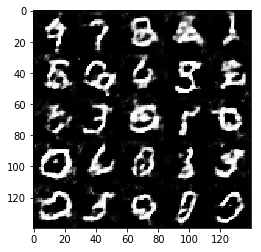

Epoch 1/2... Batch 1210... Discriminator Loss: 0.6087... Generator Loss: 1.8271
Epoch 1/2... Batch 1220... Discriminator Loss: 0.5235... Generator Loss: 1.5282
Epoch 1/2... Batch 1230... Discriminator Loss: 0.7094... Generator Loss: 1.2527
Epoch 1/2... Batch 1240... Discriminator Loss: 0.6471... Generator Loss: 1.1327
Epoch 1/2... Batch 1250... Discriminator Loss: 0.7393... Generator Loss: 1.0913
Epoch 1/2... Batch 1260... Discriminator Loss: 0.5249... Generator Loss: 1.6511
Epoch 1/2... Batch 1270... Discriminator Loss: 0.5240... Generator Loss: 2.9178
Epoch 1/2... Batch 1280... Discriminator Loss: 0.7195... Generator Loss: 1.1293
Epoch 1/2... Batch 1290... Discriminator Loss: 0.4905... Generator Loss: 1.4784
Epoch 1/2... Batch 1300... Discriminator Loss: 0.5776... Generator Loss: 1.7847


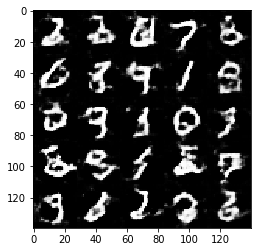

Epoch 1/2... Batch 1310... Discriminator Loss: 0.9791... Generator Loss: 2.6428
Epoch 1/2... Batch 1320... Discriminator Loss: 0.9431... Generator Loss: 0.7206
Epoch 1/2... Batch 1330... Discriminator Loss: 0.8676... Generator Loss: 0.9164
Epoch 1/2... Batch 1340... Discriminator Loss: 1.1009... Generator Loss: 0.5812
Epoch 1/2... Batch 1350... Discriminator Loss: 0.9873... Generator Loss: 0.6576
Epoch 1/2... Batch 1360... Discriminator Loss: 0.8042... Generator Loss: 0.8376
Epoch 1/2... Batch 1370... Discriminator Loss: 0.6233... Generator Loss: 2.6205
Epoch 1/2... Batch 1380... Discriminator Loss: 0.5773... Generator Loss: 1.3602
Epoch 1/2... Batch 1390... Discriminator Loss: 0.9013... Generator Loss: 0.7141
Epoch 1/2... Batch 1400... Discriminator Loss: 0.6480... Generator Loss: 1.3545


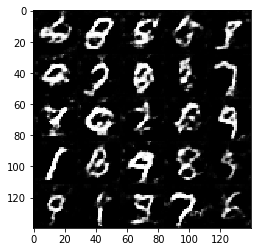

Epoch 1/2... Batch 1410... Discriminator Loss: 0.7441... Generator Loss: 1.1069
Epoch 1/2... Batch 1420... Discriminator Loss: 0.5445... Generator Loss: 1.5356
Epoch 1/2... Batch 1430... Discriminator Loss: 0.4849... Generator Loss: 2.1720
Epoch 1/2... Batch 1440... Discriminator Loss: 0.5206... Generator Loss: 1.6917
Epoch 1/2... Batch 1450... Discriminator Loss: 0.5888... Generator Loss: 1.3540
Epoch 1/2... Batch 1460... Discriminator Loss: 0.6221... Generator Loss: 1.0688
Epoch 1/2... Batch 1470... Discriminator Loss: 0.7304... Generator Loss: 2.7035
Epoch 1/2... Batch 1480... Discriminator Loss: 0.6615... Generator Loss: 2.3039
Epoch 1/2... Batch 1490... Discriminator Loss: 0.5293... Generator Loss: 1.2925
Epoch 1/2... Batch 1500... Discriminator Loss: 1.1619... Generator Loss: 0.5128


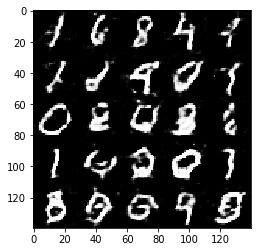

Epoch 1/2... Batch 1510... Discriminator Loss: 0.6827... Generator Loss: 1.1230
Epoch 1/2... Batch 1520... Discriminator Loss: 0.5478... Generator Loss: 1.4452
Epoch 1/2... Batch 1530... Discriminator Loss: 0.4969... Generator Loss: 1.4852
Epoch 1/2... Batch 1540... Discriminator Loss: 0.6486... Generator Loss: 1.2379
Epoch 1/2... Batch 1550... Discriminator Loss: 0.6299... Generator Loss: 1.2559
Epoch 1/2... Batch 1560... Discriminator Loss: 0.6042... Generator Loss: 1.3105
Epoch 1/2... Batch 1570... Discriminator Loss: 0.4778... Generator Loss: 1.6390
Epoch 1/2... Batch 1580... Discriminator Loss: 0.5029... Generator Loss: 1.2474
Epoch 1/2... Batch 1590... Discriminator Loss: 0.8692... Generator Loss: 0.7589
Epoch 1/2... Batch 1600... Discriminator Loss: 0.8973... Generator Loss: 2.7729


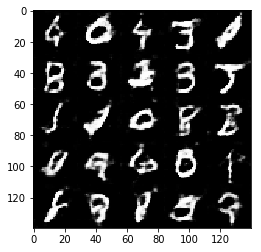

Epoch 1/2... Batch 1610... Discriminator Loss: 0.7997... Generator Loss: 0.9275
Epoch 1/2... Batch 1620... Discriminator Loss: 1.4148... Generator Loss: 0.4620
Epoch 1/2... Batch 1630... Discriminator Loss: 0.7928... Generator Loss: 0.8895
Epoch 1/2... Batch 1640... Discriminator Loss: 0.4120... Generator Loss: 1.9446
Epoch 1/2... Batch 1650... Discriminator Loss: 1.2225... Generator Loss: 0.4727
Epoch 1/2... Batch 1660... Discriminator Loss: 0.5677... Generator Loss: 1.1054
Epoch 1/2... Batch 1670... Discriminator Loss: 0.7861... Generator Loss: 0.8438
Epoch 1/2... Batch 1680... Discriminator Loss: 0.8048... Generator Loss: 1.0810
Epoch 1/2... Batch 1690... Discriminator Loss: 0.5659... Generator Loss: 1.6068
Epoch 1/2... Batch 1700... Discriminator Loss: 0.7601... Generator Loss: 1.9217


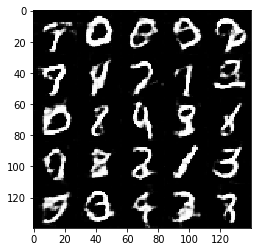

Epoch 1/2... Batch 1710... Discriminator Loss: 0.5223... Generator Loss: 1.5242
Epoch 1/2... Batch 1720... Discriminator Loss: 1.0622... Generator Loss: 0.6164
Epoch 1/2... Batch 1730... Discriminator Loss: 0.5679... Generator Loss: 1.5178
Epoch 1/2... Batch 1740... Discriminator Loss: 0.3984... Generator Loss: 1.8401
Epoch 1/2... Batch 1750... Discriminator Loss: 0.7546... Generator Loss: 0.8497
Epoch 1/2... Batch 1760... Discriminator Loss: 0.5318... Generator Loss: 1.5920
Epoch 1/2... Batch 1770... Discriminator Loss: 0.6812... Generator Loss: 0.8824
Epoch 1/2... Batch 1780... Discriminator Loss: 0.6210... Generator Loss: 1.2451
Epoch 1/2... Batch 1790... Discriminator Loss: 0.6885... Generator Loss: 0.9653
Epoch 1/2... Batch 1800... Discriminator Loss: 0.5019... Generator Loss: 1.2862


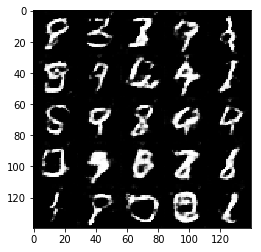

Epoch 1/2... Batch 1810... Discriminator Loss: 0.6330... Generator Loss: 1.0350
Epoch 1/2... Batch 1820... Discriminator Loss: 0.3393... Generator Loss: 1.9312
Epoch 1/2... Batch 1830... Discriminator Loss: 0.6302... Generator Loss: 2.6865
Epoch 1/2... Batch 1840... Discriminator Loss: 0.5854... Generator Loss: 2.3679
Epoch 1/2... Batch 1850... Discriminator Loss: 0.4957... Generator Loss: 1.2751
Epoch 1/2... Batch 1860... Discriminator Loss: 0.8629... Generator Loss: 0.7298
Epoch 1/2... Batch 1870... Discriminator Loss: 0.5727... Generator Loss: 1.6386
Epoch 2/2... Batch 10... Discriminator Loss: 0.7192... Generator Loss: 1.6172
Epoch 2/2... Batch 20... Discriminator Loss: 0.6666... Generator Loss: 1.0824
Epoch 2/2... Batch 30... Discriminator Loss: 0.7408... Generator Loss: 1.2029
Epoch 2/2... Batch 40... Discriminator Loss: 0.5645... Generator Loss: 1.4226
Epoch 2/2... Batch 50... Discriminator Loss: 0.5917... Generator Loss: 1.0946
Epoch 2/2... Batch 60... Discriminator Loss: 1.309

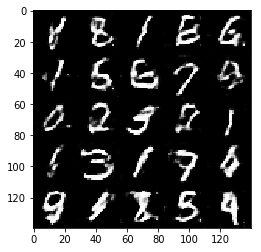

Epoch 2/2... Batch 110... Discriminator Loss: 0.8229... Generator Loss: 0.7588
Epoch 2/2... Batch 120... Discriminator Loss: 0.5723... Generator Loss: 1.2420
Epoch 2/2... Batch 130... Discriminator Loss: 0.4692... Generator Loss: 1.4915
Epoch 2/2... Batch 140... Discriminator Loss: 1.2037... Generator Loss: 0.4932
Epoch 2/2... Batch 150... Discriminator Loss: 0.7301... Generator Loss: 1.0012
Epoch 2/2... Batch 160... Discriminator Loss: 0.5837... Generator Loss: 1.2485
Epoch 2/2... Batch 170... Discriminator Loss: 0.8174... Generator Loss: 0.8173
Epoch 2/2... Batch 180... Discriminator Loss: 0.8169... Generator Loss: 0.7835
Epoch 2/2... Batch 190... Discriminator Loss: 0.6108... Generator Loss: 1.1379
Epoch 2/2... Batch 200... Discriminator Loss: 0.5534... Generator Loss: 2.2966


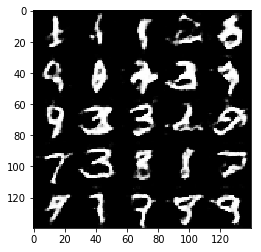

Epoch 2/2... Batch 210... Discriminator Loss: 0.5843... Generator Loss: 1.2245
Epoch 2/2... Batch 220... Discriminator Loss: 0.5306... Generator Loss: 1.3142
Epoch 2/2... Batch 230... Discriminator Loss: 0.5141... Generator Loss: 1.4450
Epoch 2/2... Batch 240... Discriminator Loss: 2.6278... Generator Loss: 5.4245
Epoch 2/2... Batch 250... Discriminator Loss: 1.1541... Generator Loss: 0.5001
Epoch 2/2... Batch 260... Discriminator Loss: 0.4419... Generator Loss: 1.6405
Epoch 2/2... Batch 270... Discriminator Loss: 0.6400... Generator Loss: 1.0182
Epoch 2/2... Batch 280... Discriminator Loss: 0.5899... Generator Loss: 1.1638
Epoch 2/2... Batch 290... Discriminator Loss: 0.4623... Generator Loss: 1.3394
Epoch 2/2... Batch 300... Discriminator Loss: 0.5424... Generator Loss: 1.0900


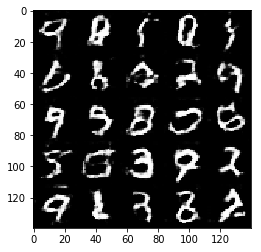

Epoch 2/2... Batch 310... Discriminator Loss: 0.9322... Generator Loss: 0.6384
Epoch 2/2... Batch 320... Discriminator Loss: 1.7974... Generator Loss: 5.0614
Epoch 2/2... Batch 330... Discriminator Loss: 0.5694... Generator Loss: 1.3388
Epoch 2/2... Batch 340... Discriminator Loss: 1.3445... Generator Loss: 0.4408
Epoch 2/2... Batch 350... Discriminator Loss: 0.7522... Generator Loss: 1.0070
Epoch 2/2... Batch 360... Discriminator Loss: 0.5905... Generator Loss: 1.6035
Epoch 2/2... Batch 370... Discriminator Loss: 1.0616... Generator Loss: 0.5763
Epoch 2/2... Batch 380... Discriminator Loss: 0.5342... Generator Loss: 1.2451
Epoch 2/2... Batch 390... Discriminator Loss: 0.5833... Generator Loss: 1.2720
Epoch 2/2... Batch 400... Discriminator Loss: 0.9882... Generator Loss: 0.6210


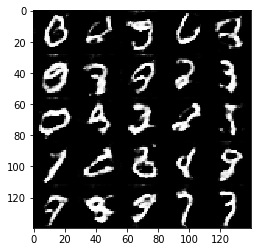

Epoch 2/2... Batch 410... Discriminator Loss: 0.3861... Generator Loss: 1.6270
Epoch 2/2... Batch 420... Discriminator Loss: 1.3847... Generator Loss: 0.4011
Epoch 2/2... Batch 430... Discriminator Loss: 1.1659... Generator Loss: 0.4828
Epoch 2/2... Batch 440... Discriminator Loss: 0.5788... Generator Loss: 1.2282
Epoch 2/2... Batch 450... Discriminator Loss: 0.3652... Generator Loss: 1.8487
Epoch 2/2... Batch 460... Discriminator Loss: 0.7548... Generator Loss: 0.7945
Epoch 2/2... Batch 470... Discriminator Loss: 0.6550... Generator Loss: 0.9967
Epoch 2/2... Batch 480... Discriminator Loss: 0.2910... Generator Loss: 1.9658
Epoch 2/2... Batch 490... Discriminator Loss: 0.4765... Generator Loss: 1.4933
Epoch 2/2... Batch 500... Discriminator Loss: 0.5656... Generator Loss: 1.0739


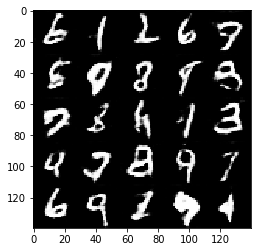

Epoch 2/2... Batch 510... Discriminator Loss: 0.3784... Generator Loss: 2.1581
Epoch 2/2... Batch 520... Discriminator Loss: 0.6714... Generator Loss: 1.0392
Epoch 2/2... Batch 530... Discriminator Loss: 1.5793... Generator Loss: 0.3587
Epoch 2/2... Batch 540... Discriminator Loss: 0.8695... Generator Loss: 0.7051
Epoch 2/2... Batch 550... Discriminator Loss: 1.1900... Generator Loss: 0.5041
Epoch 2/2... Batch 560... Discriminator Loss: 0.6521... Generator Loss: 1.0615
Epoch 2/2... Batch 570... Discriminator Loss: 1.0768... Generator Loss: 0.5793
Epoch 2/2... Batch 580... Discriminator Loss: 0.9229... Generator Loss: 0.7648
Epoch 2/2... Batch 590... Discriminator Loss: 0.9440... Generator Loss: 0.6724
Epoch 2/2... Batch 600... Discriminator Loss: 0.8718... Generator Loss: 3.0423


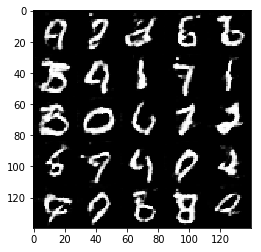

Epoch 2/2... Batch 610... Discriminator Loss: 1.0123... Generator Loss: 0.5790
Epoch 2/2... Batch 620... Discriminator Loss: 0.7227... Generator Loss: 0.8938
Epoch 2/2... Batch 630... Discriminator Loss: 0.6922... Generator Loss: 0.9408
Epoch 2/2... Batch 640... Discriminator Loss: 0.6226... Generator Loss: 1.3063
Epoch 2/2... Batch 650... Discriminator Loss: 0.6802... Generator Loss: 1.0857
Epoch 2/2... Batch 660... Discriminator Loss: 0.4707... Generator Loss: 2.2715
Epoch 2/2... Batch 670... Discriminator Loss: 0.7833... Generator Loss: 0.8958
Epoch 2/2... Batch 680... Discriminator Loss: 0.9334... Generator Loss: 0.7104
Epoch 2/2... Batch 690... Discriminator Loss: 2.1664... Generator Loss: 4.5506
Epoch 2/2... Batch 700... Discriminator Loss: 0.4213... Generator Loss: 1.4613


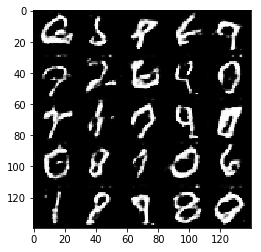

Epoch 2/2... Batch 710... Discriminator Loss: 0.6847... Generator Loss: 0.9870
Epoch 2/2... Batch 720... Discriminator Loss: 0.7683... Generator Loss: 0.9252
Epoch 2/2... Batch 730... Discriminator Loss: 0.6364... Generator Loss: 1.1061
Epoch 2/2... Batch 740... Discriminator Loss: 0.4309... Generator Loss: 1.9181
Epoch 2/2... Batch 750... Discriminator Loss: 0.4900... Generator Loss: 1.5453
Epoch 2/2... Batch 760... Discriminator Loss: 0.5358... Generator Loss: 1.2426
Epoch 2/2... Batch 770... Discriminator Loss: 0.7230... Generator Loss: 0.9799
Epoch 2/2... Batch 780... Discriminator Loss: 0.8006... Generator Loss: 0.7980
Epoch 2/2... Batch 790... Discriminator Loss: 0.3792... Generator Loss: 1.9477
Epoch 2/2... Batch 800... Discriminator Loss: 0.6788... Generator Loss: 1.0588


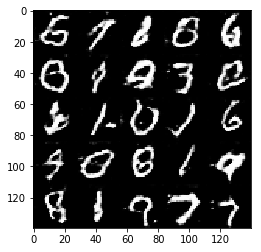

Epoch 2/2... Batch 810... Discriminator Loss: 0.5843... Generator Loss: 1.6472
Epoch 2/2... Batch 820... Discriminator Loss: 0.4505... Generator Loss: 1.4186
Epoch 2/2... Batch 830... Discriminator Loss: 1.1421... Generator Loss: 0.5073
Epoch 2/2... Batch 840... Discriminator Loss: 1.1065... Generator Loss: 1.4502
Epoch 2/2... Batch 850... Discriminator Loss: 1.0867... Generator Loss: 0.6717
Epoch 2/2... Batch 860... Discriminator Loss: 0.8416... Generator Loss: 0.7901
Epoch 2/2... Batch 870... Discriminator Loss: 0.4106... Generator Loss: 1.4571
Epoch 2/2... Batch 880... Discriminator Loss: 0.3396... Generator Loss: 1.8271
Epoch 2/2... Batch 890... Discriminator Loss: 0.5974... Generator Loss: 1.1715
Epoch 2/2... Batch 900... Discriminator Loss: 0.5954... Generator Loss: 1.0357


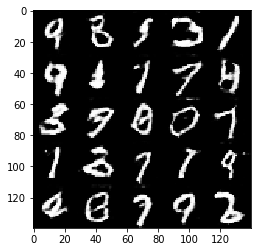

Epoch 2/2... Batch 910... Discriminator Loss: 1.7103... Generator Loss: 0.3024
Epoch 2/2... Batch 920... Discriminator Loss: 0.7099... Generator Loss: 0.9831
Epoch 2/2... Batch 930... Discriminator Loss: 0.8533... Generator Loss: 1.3713
Epoch 2/2... Batch 940... Discriminator Loss: 0.6237... Generator Loss: 1.0440
Epoch 2/2... Batch 950... Discriminator Loss: 0.6379... Generator Loss: 1.3048
Epoch 2/2... Batch 960... Discriminator Loss: 0.6525... Generator Loss: 1.1156
Epoch 2/2... Batch 970... Discriminator Loss: 0.5148... Generator Loss: 1.1847
Epoch 2/2... Batch 980... Discriminator Loss: 0.3485... Generator Loss: 1.7547
Epoch 2/2... Batch 990... Discriminator Loss: 0.3924... Generator Loss: 1.6754
Epoch 2/2... Batch 1000... Discriminator Loss: 0.9862... Generator Loss: 0.6117


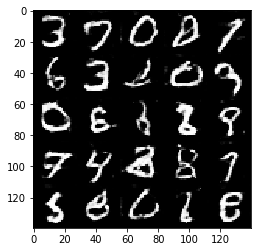

Epoch 2/2... Batch 1010... Discriminator Loss: 0.4560... Generator Loss: 1.6824
Epoch 2/2... Batch 1020... Discriminator Loss: 0.8109... Generator Loss: 1.0144
Epoch 2/2... Batch 1030... Discriminator Loss: 1.1585... Generator Loss: 0.5742
Epoch 2/2... Batch 1040... Discriminator Loss: 0.6492... Generator Loss: 1.1167
Epoch 2/2... Batch 1050... Discriminator Loss: 1.3184... Generator Loss: 0.4729
Epoch 2/2... Batch 1060... Discriminator Loss: 0.5940... Generator Loss: 1.2445
Epoch 2/2... Batch 1070... Discriminator Loss: 0.8603... Generator Loss: 0.8149
Epoch 2/2... Batch 1080... Discriminator Loss: 0.6772... Generator Loss: 0.9690
Epoch 2/2... Batch 1090... Discriminator Loss: 0.6574... Generator Loss: 1.1606
Epoch 2/2... Batch 1100... Discriminator Loss: 0.2749... Generator Loss: 2.4204


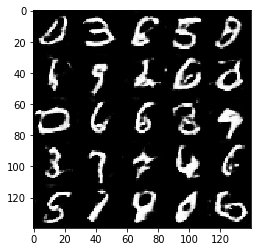

Epoch 2/2... Batch 1110... Discriminator Loss: 0.4916... Generator Loss: 1.5309
Epoch 2/2... Batch 1120... Discriminator Loss: 1.2934... Generator Loss: 0.4432
Epoch 2/2... Batch 1130... Discriminator Loss: 0.4718... Generator Loss: 1.7439
Epoch 2/2... Batch 1140... Discriminator Loss: 0.6094... Generator Loss: 1.0449
Epoch 2/2... Batch 1150... Discriminator Loss: 0.4211... Generator Loss: 1.8347
Epoch 2/2... Batch 1160... Discriminator Loss: 0.4661... Generator Loss: 1.5854
Epoch 2/2... Batch 1170... Discriminator Loss: 0.6677... Generator Loss: 0.9921
Epoch 2/2... Batch 1180... Discriminator Loss: 1.1894... Generator Loss: 0.5535
Epoch 2/2... Batch 1190... Discriminator Loss: 0.6222... Generator Loss: 3.2286
Epoch 2/2... Batch 1200... Discriminator Loss: 0.4384... Generator Loss: 1.7924


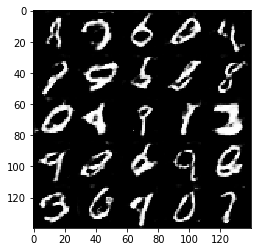

Epoch 2/2... Batch 1210... Discriminator Loss: 0.5243... Generator Loss: 1.2934
Epoch 2/2... Batch 1220... Discriminator Loss: 0.2980... Generator Loss: 2.0061
Epoch 2/2... Batch 1230... Discriminator Loss: 0.4527... Generator Loss: 1.3176
Epoch 2/2... Batch 1240... Discriminator Loss: 0.4142... Generator Loss: 1.9818
Epoch 2/2... Batch 1250... Discriminator Loss: 0.8408... Generator Loss: 0.7871
Epoch 2/2... Batch 1260... Discriminator Loss: 0.6548... Generator Loss: 1.1585
Epoch 2/2... Batch 1270... Discriminator Loss: 0.2547... Generator Loss: 2.9141
Epoch 2/2... Batch 1280... Discriminator Loss: 0.3776... Generator Loss: 1.8383
Epoch 2/2... Batch 1290... Discriminator Loss: 0.7649... Generator Loss: 1.2731
Epoch 2/2... Batch 1300... Discriminator Loss: 0.4845... Generator Loss: 1.7586


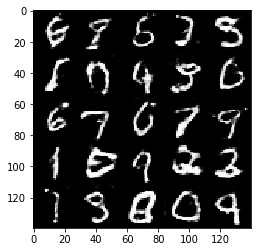

Epoch 2/2... Batch 1310... Discriminator Loss: 0.7468... Generator Loss: 0.8948
Epoch 2/2... Batch 1320... Discriminator Loss: 0.3995... Generator Loss: 1.6845
Epoch 2/2... Batch 1330... Discriminator Loss: 0.6593... Generator Loss: 1.0052
Epoch 2/2... Batch 1340... Discriminator Loss: 0.6737... Generator Loss: 0.9307
Epoch 2/2... Batch 1350... Discriminator Loss: 1.0142... Generator Loss: 0.6545
Epoch 2/2... Batch 1360... Discriminator Loss: 1.0801... Generator Loss: 0.5867
Epoch 2/2... Batch 1370... Discriminator Loss: 0.4486... Generator Loss: 1.4265
Epoch 2/2... Batch 1380... Discriminator Loss: 0.8154... Generator Loss: 1.0877
Epoch 2/2... Batch 1390... Discriminator Loss: 0.6748... Generator Loss: 1.2626
Epoch 2/2... Batch 1400... Discriminator Loss: 1.1106... Generator Loss: 0.6437


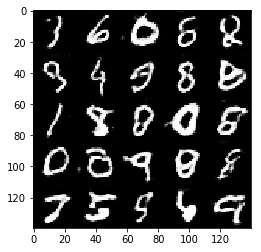

Epoch 2/2... Batch 1410... Discriminator Loss: 0.9701... Generator Loss: 0.6880
Epoch 2/2... Batch 1420... Discriminator Loss: 0.3101... Generator Loss: 2.2835
Epoch 2/2... Batch 1430... Discriminator Loss: 0.9138... Generator Loss: 0.7533
Epoch 2/2... Batch 1440... Discriminator Loss: 0.4690... Generator Loss: 1.1718
Epoch 2/2... Batch 1450... Discriminator Loss: 0.4274... Generator Loss: 1.3681
Epoch 2/2... Batch 1460... Discriminator Loss: 0.5559... Generator Loss: 1.1637
Epoch 2/2... Batch 1470... Discriminator Loss: 0.4327... Generator Loss: 1.4600
Epoch 2/2... Batch 1480... Discriminator Loss: 0.6843... Generator Loss: 1.0000
Epoch 2/2... Batch 1490... Discriminator Loss: 0.5893... Generator Loss: 1.0735
Epoch 2/2... Batch 1500... Discriminator Loss: 0.7057... Generator Loss: 1.1523


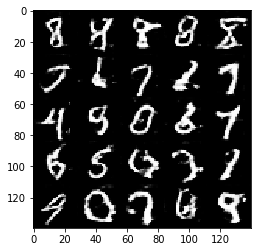

Epoch 2/2... Batch 1510... Discriminator Loss: 0.7750... Generator Loss: 0.9834
Epoch 2/2... Batch 1520... Discriminator Loss: 0.4283... Generator Loss: 2.5993
Epoch 2/2... Batch 1530... Discriminator Loss: 0.4849... Generator Loss: 1.2655
Epoch 2/2... Batch 1540... Discriminator Loss: 0.5476... Generator Loss: 1.1249
Epoch 2/2... Batch 1550... Discriminator Loss: 0.4993... Generator Loss: 1.2143
Epoch 2/2... Batch 1560... Discriminator Loss: 0.6960... Generator Loss: 1.2467
Epoch 2/2... Batch 1570... Discriminator Loss: 0.3063... Generator Loss: 1.8468
Epoch 2/2... Batch 1580... Discriminator Loss: 0.4350... Generator Loss: 1.4058
Epoch 2/2... Batch 1590... Discriminator Loss: 0.5250... Generator Loss: 1.3275
Epoch 2/2... Batch 1600... Discriminator Loss: 0.3113... Generator Loss: 2.8489


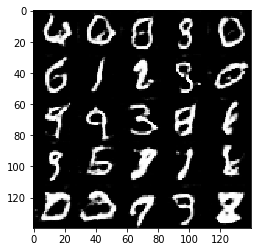

Epoch 2/2... Batch 1610... Discriminator Loss: 0.4730... Generator Loss: 1.4190
Epoch 2/2... Batch 1620... Discriminator Loss: 0.3562... Generator Loss: 2.0966
Epoch 2/2... Batch 1630... Discriminator Loss: 0.8276... Generator Loss: 0.8415
Epoch 2/2... Batch 1640... Discriminator Loss: 0.5922... Generator Loss: 1.0932
Epoch 2/2... Batch 1650... Discriminator Loss: 2.6164... Generator Loss: 0.1187
Epoch 2/2... Batch 1660... Discriminator Loss: 0.3332... Generator Loss: 1.8591
Epoch 2/2... Batch 1670... Discriminator Loss: 0.8673... Generator Loss: 0.8770
Epoch 2/2... Batch 1680... Discriminator Loss: 0.4716... Generator Loss: 1.4585
Epoch 2/2... Batch 1690... Discriminator Loss: 0.6193... Generator Loss: 1.1678
Epoch 2/2... Batch 1700... Discriminator Loss: 0.3758... Generator Loss: 1.6488


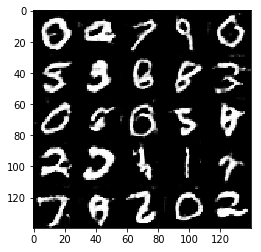

Epoch 2/2... Batch 1710... Discriminator Loss: 0.3057... Generator Loss: 1.7907
Epoch 2/2... Batch 1720... Discriminator Loss: 0.6958... Generator Loss: 2.1549
Epoch 2/2... Batch 1730... Discriminator Loss: 0.5991... Generator Loss: 1.1108
Epoch 2/2... Batch 1740... Discriminator Loss: 0.7311... Generator Loss: 0.9805
Epoch 2/2... Batch 1750... Discriminator Loss: 0.5155... Generator Loss: 1.2992
Epoch 2/2... Batch 1760... Discriminator Loss: 0.7169... Generator Loss: 1.0041
Epoch 2/2... Batch 1770... Discriminator Loss: 0.3538... Generator Loss: 1.7592
Epoch 2/2... Batch 1780... Discriminator Loss: 0.5239... Generator Loss: 1.2214
Epoch 2/2... Batch 1790... Discriminator Loss: 0.5879... Generator Loss: 2.6342
Epoch 2/2... Batch 1800... Discriminator Loss: 0.9562... Generator Loss: 0.7797


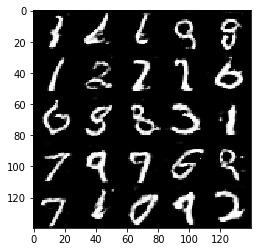

Epoch 2/2... Batch 1810... Discriminator Loss: 0.6409... Generator Loss: 1.0517
Epoch 2/2... Batch 1820... Discriminator Loss: 0.5133... Generator Loss: 1.2091
Epoch 2/2... Batch 1830... Discriminator Loss: 1.1248... Generator Loss: 0.5909
Epoch 2/2... Batch 1840... Discriminator Loss: 0.8849... Generator Loss: 0.7153
Epoch 2/2... Batch 1850... Discriminator Loss: 0.3587... Generator Loss: 1.5870
Epoch 2/2... Batch 1860... Discriminator Loss: 0.7800... Generator Loss: 1.0027
Epoch 2/2... Batch 1870... Discriminator Loss: 0.5294... Generator Loss: 1.1545


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 0.3110... Generator Loss: 9.1354
Epoch 1/1... Batch 20... Discriminator Loss: 6.7563... Generator Loss: 0.0013
Epoch 1/1... Batch 30... Discriminator Loss: 0.4968... Generator Loss: 12.8739
Epoch 1/1... Batch 40... Discriminator Loss: 0.2970... Generator Loss: 7.8867
Epoch 1/1... Batch 50... Discriminator Loss: 0.6063... Generator Loss: 3.4185
Epoch 1/1... Batch 60... Discriminator Loss: 0.2388... Generator Loss: 8.2140
Epoch 1/1... Batch 70... Discriminator Loss: 1.8800... Generator Loss: 0.2802
Epoch 1/1... Batch 80... Discriminator Loss: 0.2924... Generator Loss: 3.4394
Epoch 1/1... Batch 90... Discriminator Loss: 0.4601... Generator Loss: 2.7617
Epoch 1/1... Batch 100... Discriminator Loss: 0.5517... Generator Loss: 1.4141


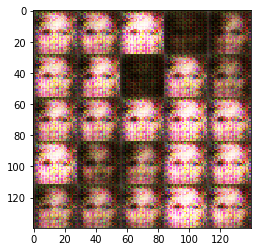

Epoch 1/1... Batch 110... Discriminator Loss: 0.7435... Generator Loss: 1.4346
Epoch 1/1... Batch 120... Discriminator Loss: 1.6069... Generator Loss: 0.3721
Epoch 1/1... Batch 130... Discriminator Loss: 0.4223... Generator Loss: 1.7585
Epoch 1/1... Batch 140... Discriminator Loss: 0.8646... Generator Loss: 0.7127
Epoch 1/1... Batch 150... Discriminator Loss: 1.6570... Generator Loss: 0.2964
Epoch 1/1... Batch 160... Discriminator Loss: 1.5331... Generator Loss: 4.5343
Epoch 1/1... Batch 170... Discriminator Loss: 1.4841... Generator Loss: 0.4269
Epoch 1/1... Batch 180... Discriminator Loss: 1.1957... Generator Loss: 3.0986
Epoch 1/1... Batch 190... Discriminator Loss: 1.2584... Generator Loss: 4.5331
Epoch 1/1... Batch 200... Discriminator Loss: 0.8126... Generator Loss: 1.4202


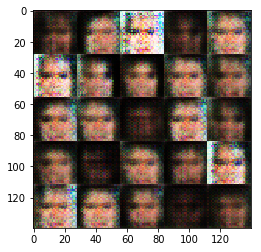

Epoch 1/1... Batch 210... Discriminator Loss: 0.9406... Generator Loss: 0.9084
Epoch 1/1... Batch 220... Discriminator Loss: 1.4838... Generator Loss: 0.7087
Epoch 1/1... Batch 230... Discriminator Loss: 1.2246... Generator Loss: 1.0353
Epoch 1/1... Batch 240... Discriminator Loss: 1.1054... Generator Loss: 0.7177
Epoch 1/1... Batch 250... Discriminator Loss: 1.1632... Generator Loss: 0.9298
Epoch 1/1... Batch 260... Discriminator Loss: 1.4023... Generator Loss: 1.8402
Epoch 1/1... Batch 270... Discriminator Loss: 1.5556... Generator Loss: 0.3411
Epoch 1/1... Batch 280... Discriminator Loss: 0.9127... Generator Loss: 0.9221
Epoch 1/1... Batch 290... Discriminator Loss: 1.1802... Generator Loss: 1.1804
Epoch 1/1... Batch 300... Discriminator Loss: 1.0287... Generator Loss: 0.8675


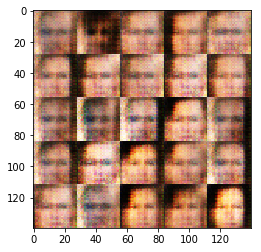

Epoch 1/1... Batch 310... Discriminator Loss: 1.3094... Generator Loss: 0.9267
Epoch 1/1... Batch 320... Discriminator Loss: 1.0669... Generator Loss: 0.5998
Epoch 1/1... Batch 330... Discriminator Loss: 0.8794... Generator Loss: 2.2609
Epoch 1/1... Batch 340... Discriminator Loss: 1.2932... Generator Loss: 1.2298
Epoch 1/1... Batch 350... Discriminator Loss: 1.0700... Generator Loss: 0.9653
Epoch 1/1... Batch 360... Discriminator Loss: 1.1771... Generator Loss: 1.2644
Epoch 1/1... Batch 370... Discriminator Loss: 1.1231... Generator Loss: 0.7738
Epoch 1/1... Batch 380... Discriminator Loss: 1.2281... Generator Loss: 0.5940
Epoch 1/1... Batch 390... Discriminator Loss: 0.9362... Generator Loss: 1.2091
Epoch 1/1... Batch 400... Discriminator Loss: 1.6296... Generator Loss: 0.2881


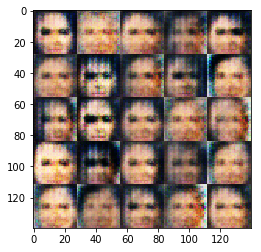

Epoch 1/1... Batch 410... Discriminator Loss: 0.9760... Generator Loss: 0.9444
Epoch 1/1... Batch 420... Discriminator Loss: 1.0908... Generator Loss: 1.5101
Epoch 1/1... Batch 430... Discriminator Loss: 1.1983... Generator Loss: 0.8013
Epoch 1/1... Batch 440... Discriminator Loss: 0.9155... Generator Loss: 1.3215
Epoch 1/1... Batch 450... Discriminator Loss: 1.0797... Generator Loss: 0.9859
Epoch 1/1... Batch 460... Discriminator Loss: 0.8749... Generator Loss: 1.1582
Epoch 1/1... Batch 470... Discriminator Loss: 1.2587... Generator Loss: 1.4068
Epoch 1/1... Batch 480... Discriminator Loss: 1.2098... Generator Loss: 0.5374
Epoch 1/1... Batch 490... Discriminator Loss: 1.3410... Generator Loss: 1.4057
Epoch 1/1... Batch 500... Discriminator Loss: 1.0868... Generator Loss: 0.6748


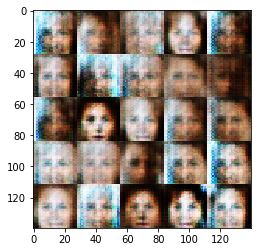

Epoch 1/1... Batch 510... Discriminator Loss: 0.9759... Generator Loss: 0.8003
Epoch 1/1... Batch 520... Discriminator Loss: 0.9800... Generator Loss: 0.7570
Epoch 1/1... Batch 530... Discriminator Loss: 0.9049... Generator Loss: 1.2495
Epoch 1/1... Batch 540... Discriminator Loss: 0.8201... Generator Loss: 1.0845
Epoch 1/1... Batch 550... Discriminator Loss: 1.0105... Generator Loss: 2.1938
Epoch 1/1... Batch 560... Discriminator Loss: 0.8647... Generator Loss: 0.9050
Epoch 1/1... Batch 570... Discriminator Loss: 1.3598... Generator Loss: 0.4783
Epoch 1/1... Batch 580... Discriminator Loss: 0.8347... Generator Loss: 1.7410
Epoch 1/1... Batch 590... Discriminator Loss: 0.9970... Generator Loss: 0.7876
Epoch 1/1... Batch 600... Discriminator Loss: 1.1180... Generator Loss: 1.0609


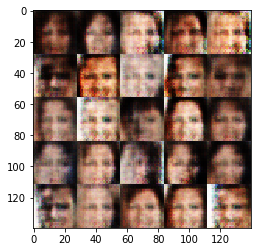

Epoch 1/1... Batch 610... Discriminator Loss: 1.1326... Generator Loss: 0.6303
Epoch 1/1... Batch 620... Discriminator Loss: 1.3847... Generator Loss: 0.4486
Epoch 1/1... Batch 630... Discriminator Loss: 1.2685... Generator Loss: 0.5520
Epoch 1/1... Batch 640... Discriminator Loss: 1.1357... Generator Loss: 0.6079
Epoch 1/1... Batch 650... Discriminator Loss: 1.3926... Generator Loss: 0.6685
Epoch 1/1... Batch 660... Discriminator Loss: 1.3485... Generator Loss: 1.2050
Epoch 1/1... Batch 670... Discriminator Loss: 1.2145... Generator Loss: 0.8306
Epoch 1/1... Batch 680... Discriminator Loss: 1.3268... Generator Loss: 2.9133
Epoch 1/1... Batch 690... Discriminator Loss: 1.2068... Generator Loss: 0.7478
Epoch 1/1... Batch 700... Discriminator Loss: 1.6376... Generator Loss: 0.3930


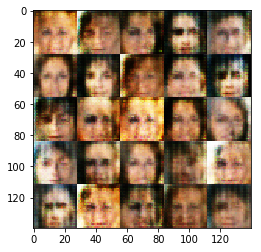

Epoch 1/1... Batch 710... Discriminator Loss: 1.0409... Generator Loss: 0.6890
Epoch 1/1... Batch 720... Discriminator Loss: 1.2408... Generator Loss: 0.5474
Epoch 1/1... Batch 730... Discriminator Loss: 1.6154... Generator Loss: 0.2937
Epoch 1/1... Batch 740... Discriminator Loss: 1.7477... Generator Loss: 0.3027
Epoch 1/1... Batch 750... Discriminator Loss: 0.9709... Generator Loss: 1.0208
Epoch 1/1... Batch 760... Discriminator Loss: 1.5065... Generator Loss: 0.3382
Epoch 1/1... Batch 770... Discriminator Loss: 1.1234... Generator Loss: 1.3711
Epoch 1/1... Batch 780... Discriminator Loss: 0.9960... Generator Loss: 1.1088
Epoch 1/1... Batch 790... Discriminator Loss: 1.2397... Generator Loss: 1.5143
Epoch 1/1... Batch 800... Discriminator Loss: 1.0680... Generator Loss: 1.5743


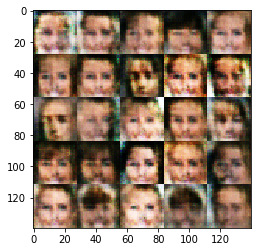

Epoch 1/1... Batch 810... Discriminator Loss: 1.4731... Generator Loss: 0.4168
Epoch 1/1... Batch 820... Discriminator Loss: 1.1950... Generator Loss: 1.3030
Epoch 1/1... Batch 830... Discriminator Loss: 1.2378... Generator Loss: 0.9944
Epoch 1/1... Batch 840... Discriminator Loss: 1.0444... Generator Loss: 1.1106
Epoch 1/1... Batch 850... Discriminator Loss: 1.0541... Generator Loss: 0.9132
Epoch 1/1... Batch 860... Discriminator Loss: 1.7867... Generator Loss: 0.2229
Epoch 1/1... Batch 870... Discriminator Loss: 1.3488... Generator Loss: 1.7909
Epoch 1/1... Batch 880... Discriminator Loss: 1.1894... Generator Loss: 0.6704
Epoch 1/1... Batch 890... Discriminator Loss: 1.0332... Generator Loss: 0.8250
Epoch 1/1... Batch 900... Discriminator Loss: 1.1032... Generator Loss: 1.0482


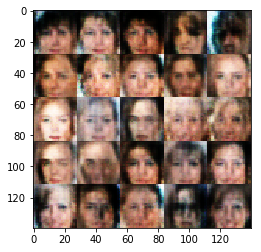

Epoch 1/1... Batch 910... Discriminator Loss: 1.2174... Generator Loss: 0.6974
Epoch 1/1... Batch 920... Discriminator Loss: 1.1727... Generator Loss: 0.6241
Epoch 1/1... Batch 930... Discriminator Loss: 1.2258... Generator Loss: 0.6609
Epoch 1/1... Batch 940... Discriminator Loss: 1.0778... Generator Loss: 0.7923
Epoch 1/1... Batch 950... Discriminator Loss: 1.2248... Generator Loss: 0.6156
Epoch 1/1... Batch 960... Discriminator Loss: 1.6178... Generator Loss: 2.0239
Epoch 1/1... Batch 970... Discriminator Loss: 1.0358... Generator Loss: 0.8555
Epoch 1/1... Batch 980... Discriminator Loss: 1.0905... Generator Loss: 0.8118
Epoch 1/1... Batch 990... Discriminator Loss: 1.2440... Generator Loss: 0.5831
Epoch 1/1... Batch 1000... Discriminator Loss: 1.1270... Generator Loss: 0.8353


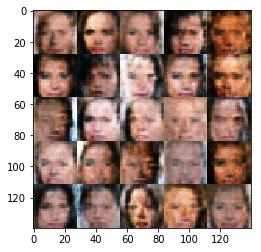

Epoch 1/1... Batch 1010... Discriminator Loss: 1.0084... Generator Loss: 0.9271
Epoch 1/1... Batch 1020... Discriminator Loss: 0.8861... Generator Loss: 1.1745
Epoch 1/1... Batch 1030... Discriminator Loss: 1.1706... Generator Loss: 0.8723
Epoch 1/1... Batch 1040... Discriminator Loss: 1.0891... Generator Loss: 0.9036
Epoch 1/1... Batch 1050... Discriminator Loss: 1.0433... Generator Loss: 0.8749
Epoch 1/1... Batch 1060... Discriminator Loss: 1.1875... Generator Loss: 0.7037
Epoch 1/1... Batch 1070... Discriminator Loss: 1.3203... Generator Loss: 0.4176
Epoch 1/1... Batch 1080... Discriminator Loss: 1.3287... Generator Loss: 0.4564
Epoch 1/1... Batch 1090... Discriminator Loss: 1.3177... Generator Loss: 0.5993
Epoch 1/1... Batch 1100... Discriminator Loss: 1.0916... Generator Loss: 0.6400


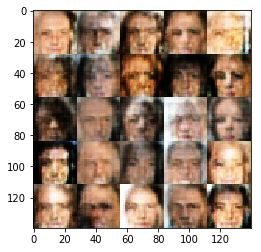

Epoch 1/1... Batch 1110... Discriminator Loss: 1.2620... Generator Loss: 1.5506
Epoch 1/1... Batch 1120... Discriminator Loss: 1.5509... Generator Loss: 0.3266
Epoch 1/1... Batch 1130... Discriminator Loss: 1.1685... Generator Loss: 0.8958
Epoch 1/1... Batch 1140... Discriminator Loss: 1.3449... Generator Loss: 0.6855
Epoch 1/1... Batch 1150... Discriminator Loss: 1.2794... Generator Loss: 0.5156
Epoch 1/1... Batch 1160... Discriminator Loss: 1.1311... Generator Loss: 1.2221
Epoch 1/1... Batch 1170... Discriminator Loss: 1.0159... Generator Loss: 0.8559
Epoch 1/1... Batch 1180... Discriminator Loss: 1.0482... Generator Loss: 0.6710
Epoch 1/1... Batch 1190... Discriminator Loss: 0.8822... Generator Loss: 0.9679
Epoch 1/1... Batch 1200... Discriminator Loss: 1.2067... Generator Loss: 0.5071


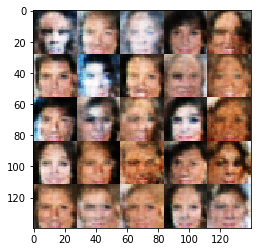

Epoch 1/1... Batch 1210... Discriminator Loss: 1.2464... Generator Loss: 0.5450
Epoch 1/1... Batch 1220... Discriminator Loss: 1.1315... Generator Loss: 0.9289
Epoch 1/1... Batch 1230... Discriminator Loss: 1.3319... Generator Loss: 0.4318
Epoch 1/1... Batch 1240... Discriminator Loss: 1.2473... Generator Loss: 2.4176
Epoch 1/1... Batch 1250... Discriminator Loss: 0.8499... Generator Loss: 1.3376
Epoch 1/1... Batch 1260... Discriminator Loss: 1.3956... Generator Loss: 0.3822
Epoch 1/1... Batch 1270... Discriminator Loss: 1.1554... Generator Loss: 0.7764
Epoch 1/1... Batch 1280... Discriminator Loss: 1.3381... Generator Loss: 0.5700
Epoch 1/1... Batch 1290... Discriminator Loss: 1.2025... Generator Loss: 1.0278
Epoch 1/1... Batch 1300... Discriminator Loss: 0.8985... Generator Loss: 0.8624


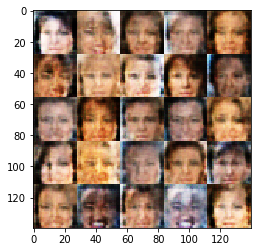

Epoch 1/1... Batch 1310... Discriminator Loss: 1.2559... Generator Loss: 0.6788
Epoch 1/1... Batch 1320... Discriminator Loss: 1.0776... Generator Loss: 0.7281
Epoch 1/1... Batch 1330... Discriminator Loss: 1.0266... Generator Loss: 0.8313
Epoch 1/1... Batch 1340... Discriminator Loss: 0.9670... Generator Loss: 1.1423
Epoch 1/1... Batch 1350... Discriminator Loss: 1.0040... Generator Loss: 0.8435
Epoch 1/1... Batch 1840... Discriminator Loss: 1.0203... Generator Loss: 1.0640
Epoch 1/1... Batch 1850... Discriminator Loss: 0.8270... Generator Loss: 1.0765
Epoch 1/1... Batch 1860... Discriminator Loss: 0.8485... Generator Loss: 0.9882
Epoch 1/1... Batch 1870... Discriminator Loss: 1.1603... Generator Loss: 0.5828
Epoch 1/1... Batch 1880... Discriminator Loss: 1.9038... Generator Loss: 0.2246
Epoch 1/1... Batch 1890... Discriminator Loss: 1.2613... Generator Loss: 0.9147
Epoch 1/1... Batch 1900... Discriminator Loss: 1.1237... Generator Loss: 0.7577


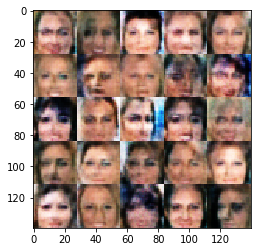

Epoch 1/1... Batch 1910... Discriminator Loss: 1.2716... Generator Loss: 0.4721
Epoch 1/1... Batch 1920... Discriminator Loss: 1.0805... Generator Loss: 0.6649
Epoch 1/1... Batch 1930... Discriminator Loss: 1.2229... Generator Loss: 0.5429
Epoch 1/1... Batch 1940... Discriminator Loss: 1.3233... Generator Loss: 0.6220
Epoch 1/1... Batch 1950... Discriminator Loss: 1.1822... Generator Loss: 0.7322
Epoch 1/1... Batch 1960... Discriminator Loss: 0.7833... Generator Loss: 1.1416
Epoch 1/1... Batch 1970... Discriminator Loss: 1.1524... Generator Loss: 0.7525
Epoch 1/1... Batch 1980... Discriminator Loss: 0.9980... Generator Loss: 0.9004
Epoch 1/1... Batch 1990... Discriminator Loss: 1.0451... Generator Loss: 0.9126
Epoch 1/1... Batch 2000... Discriminator Loss: 0.9003... Generator Loss: 0.9288


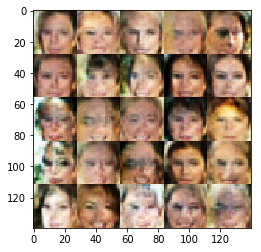

Epoch 1/1... Batch 2010... Discriminator Loss: 0.9764... Generator Loss: 1.0487
Epoch 1/1... Batch 2020... Discriminator Loss: 1.2150... Generator Loss: 0.5476
Epoch 1/1... Batch 2030... Discriminator Loss: 1.9070... Generator Loss: 0.2320
Epoch 1/1... Batch 2040... Discriminator Loss: 1.0504... Generator Loss: 0.7232
Epoch 1/1... Batch 2050... Discriminator Loss: 1.4357... Generator Loss: 0.4311
Epoch 1/1... Batch 2060... Discriminator Loss: 1.3673... Generator Loss: 0.4272
Epoch 1/1... Batch 2070... Discriminator Loss: 1.1976... Generator Loss: 0.6266
Epoch 1/1... Batch 2080... Discriminator Loss: 1.0615... Generator Loss: 1.0222
Epoch 1/1... Batch 2090... Discriminator Loss: 1.0714... Generator Loss: 0.9873
Epoch 1/1... Batch 2100... Discriminator Loss: 1.1633... Generator Loss: 0.5846


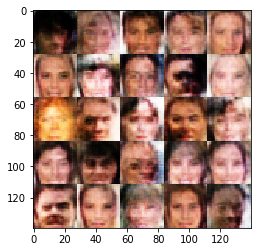

Epoch 1/1... Batch 2110... Discriminator Loss: 1.0081... Generator Loss: 1.7416
Epoch 1/1... Batch 2120... Discriminator Loss: 1.2019... Generator Loss: 0.7572
Epoch 1/1... Batch 2130... Discriminator Loss: 1.1790... Generator Loss: 0.5343
Epoch 1/1... Batch 2140... Discriminator Loss: 1.1587... Generator Loss: 0.6270
Epoch 1/1... Batch 2150... Discriminator Loss: 1.2817... Generator Loss: 0.7841
Epoch 1/1... Batch 2160... Discriminator Loss: 1.0076... Generator Loss: 0.8307
Epoch 1/1... Batch 2170... Discriminator Loss: 1.2899... Generator Loss: 0.8507
Epoch 1/1... Batch 2180... Discriminator Loss: 0.8976... Generator Loss: 1.2031
Epoch 1/1... Batch 2190... Discriminator Loss: 0.9315... Generator Loss: 1.1411
Epoch 1/1... Batch 2200... Discriminator Loss: 1.1827... Generator Loss: 1.5470


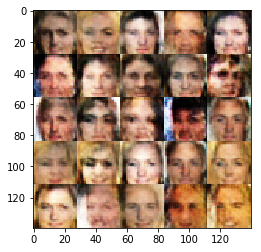

Epoch 1/1... Batch 2210... Discriminator Loss: 1.0950... Generator Loss: 0.6288
Epoch 1/1... Batch 2220... Discriminator Loss: 1.3684... Generator Loss: 0.4351
Epoch 1/1... Batch 2230... Discriminator Loss: 1.3212... Generator Loss: 1.1327
Epoch 1/1... Batch 2240... Discriminator Loss: 1.5603... Generator Loss: 0.3124
Epoch 1/1... Batch 2250... Discriminator Loss: 1.4676... Generator Loss: 0.4280
Epoch 1/1... Batch 2260... Discriminator Loss: 1.0531... Generator Loss: 0.8350
Epoch 1/1... Batch 2270... Discriminator Loss: 0.9979... Generator Loss: 0.8527
Epoch 1/1... Batch 2280... Discriminator Loss: 1.0858... Generator Loss: 0.9602
Epoch 1/1... Batch 2290... Discriminator Loss: 1.2619... Generator Loss: 0.4664
Epoch 1/1... Batch 2300... Discriminator Loss: 0.9882... Generator Loss: 0.9068


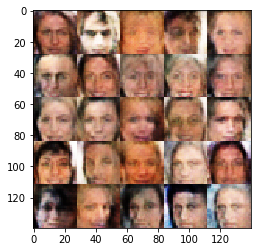

Epoch 1/1... Batch 2310... Discriminator Loss: 0.8624... Generator Loss: 1.4041
Epoch 1/1... Batch 2320... Discriminator Loss: 0.8669... Generator Loss: 1.2075
Epoch 1/1... Batch 2330... Discriminator Loss: 1.2328... Generator Loss: 0.9215
Epoch 1/1... Batch 2340... Discriminator Loss: 1.2772... Generator Loss: 0.6190
Epoch 1/1... Batch 2350... Discriminator Loss: 0.9442... Generator Loss: 1.2134
Epoch 1/1... Batch 2360... Discriminator Loss: 1.0627... Generator Loss: 1.3521
Epoch 1/1... Batch 2370... Discriminator Loss: 0.9581... Generator Loss: 1.0047
Epoch 1/1... Batch 2380... Discriminator Loss: 1.3579... Generator Loss: 0.5460
Epoch 1/1... Batch 2390... Discriminator Loss: 1.0514... Generator Loss: 0.5918
Epoch 1/1... Batch 2400... Discriminator Loss: 1.3968... Generator Loss: 2.2068


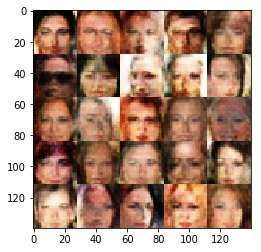

Epoch 1/1... Batch 2410... Discriminator Loss: 1.2330... Generator Loss: 0.9670
Epoch 1/1... Batch 2420... Discriminator Loss: 0.9682... Generator Loss: 1.0940
Epoch 1/1... Batch 2430... Discriminator Loss: 1.2227... Generator Loss: 0.8509
Epoch 1/1... Batch 2440... Discriminator Loss: 1.3011... Generator Loss: 0.7100
Epoch 1/1... Batch 2450... Discriminator Loss: 1.1981... Generator Loss: 0.5000
Epoch 1/1... Batch 2460... Discriminator Loss: 1.1067... Generator Loss: 1.0845
Epoch 1/1... Batch 2470... Discriminator Loss: 1.0680... Generator Loss: 1.1061
Epoch 1/1... Batch 2480... Discriminator Loss: 0.9447... Generator Loss: 0.8948
Epoch 1/1... Batch 2490... Discriminator Loss: 0.9571... Generator Loss: 0.7850
Epoch 1/1... Batch 2500... Discriminator Loss: 0.8253... Generator Loss: 1.1251


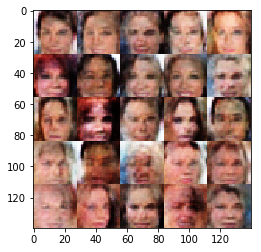

Epoch 1/1... Batch 2510... Discriminator Loss: 1.0162... Generator Loss: 1.2244
Epoch 1/1... Batch 2520... Discriminator Loss: 1.1890... Generator Loss: 0.8801
Epoch 1/1... Batch 2530... Discriminator Loss: 0.9988... Generator Loss: 0.7355
Epoch 1/1... Batch 2540... Discriminator Loss: 1.1720... Generator Loss: 0.7059
Epoch 1/1... Batch 2550... Discriminator Loss: 1.1921... Generator Loss: 0.7006
Epoch 1/1... Batch 2560... Discriminator Loss: 1.3699... Generator Loss: 0.4008
Epoch 1/1... Batch 2570... Discriminator Loss: 1.2286... Generator Loss: 1.2856
Epoch 1/1... Batch 2580... Discriminator Loss: 1.0424... Generator Loss: 0.8543
Epoch 1/1... Batch 2590... Discriminator Loss: 1.0703... Generator Loss: 0.9196
Epoch 1/1... Batch 2600... Discriminator Loss: 1.4130... Generator Loss: 0.4818


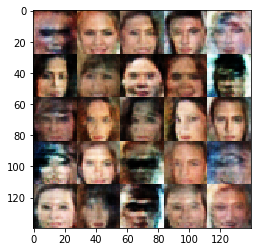

Epoch 1/1... Batch 2610... Discriminator Loss: 1.0603... Generator Loss: 0.6379
Epoch 1/1... Batch 2620... Discriminator Loss: 1.2353... Generator Loss: 0.8359
Epoch 1/1... Batch 2630... Discriminator Loss: 0.8299... Generator Loss: 1.0894
Epoch 1/1... Batch 2640... Discriminator Loss: 1.1621... Generator Loss: 0.6317
Epoch 1/1... Batch 2650... Discriminator Loss: 1.1555... Generator Loss: 0.5699
Epoch 1/1... Batch 2660... Discriminator Loss: 0.9517... Generator Loss: 1.1224
Epoch 1/1... Batch 2670... Discriminator Loss: 1.1041... Generator Loss: 1.1949
Epoch 1/1... Batch 2680... Discriminator Loss: 1.0787... Generator Loss: 0.6486
Epoch 1/1... Batch 2690... Discriminator Loss: 0.9807... Generator Loss: 0.7802
Epoch 1/1... Batch 2700... Discriminator Loss: 1.1551... Generator Loss: 0.6217


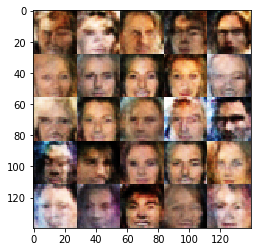

Epoch 1/1... Batch 2710... Discriminator Loss: 1.0169... Generator Loss: 0.8654
Epoch 1/1... Batch 2720... Discriminator Loss: 1.0487... Generator Loss: 0.6470
Epoch 1/1... Batch 2730... Discriminator Loss: 0.8512... Generator Loss: 1.2126
Epoch 1/1... Batch 2740... Discriminator Loss: 1.1513... Generator Loss: 1.1510
Epoch 1/1... Batch 2750... Discriminator Loss: 1.0919... Generator Loss: 0.7312
Epoch 1/1... Batch 2760... Discriminator Loss: 0.8808... Generator Loss: 1.2426
Epoch 1/1... Batch 2770... Discriminator Loss: 1.0391... Generator Loss: 0.8711
Epoch 1/1... Batch 2780... Discriminator Loss: 1.2152... Generator Loss: 1.0945
Epoch 1/1... Batch 2790... Discriminator Loss: 1.0051... Generator Loss: 1.0017
Epoch 1/1... Batch 2800... Discriminator Loss: 1.2606... Generator Loss: 0.6260


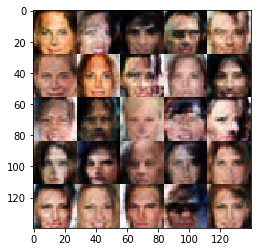

Epoch 1/1... Batch 2810... Discriminator Loss: 1.1756... Generator Loss: 0.6619
Epoch 1/1... Batch 2820... Discriminator Loss: 1.1275... Generator Loss: 0.5748
Epoch 1/1... Batch 2830... Discriminator Loss: 1.3180... Generator Loss: 0.5432
Epoch 1/1... Batch 2840... Discriminator Loss: 1.1522... Generator Loss: 0.6005
Epoch 1/1... Batch 2850... Discriminator Loss: 0.9441... Generator Loss: 0.8341
Epoch 1/1... Batch 2860... Discriminator Loss: 0.9966... Generator Loss: 0.7552
Epoch 1/1... Batch 2870... Discriminator Loss: 0.9290... Generator Loss: 0.9071
Epoch 1/1... Batch 2880... Discriminator Loss: 1.2763... Generator Loss: 0.6124
Epoch 1/1... Batch 2890... Discriminator Loss: 1.1751... Generator Loss: 0.8646
Epoch 1/1... Batch 2900... Discriminator Loss: 1.0111... Generator Loss: 1.0192


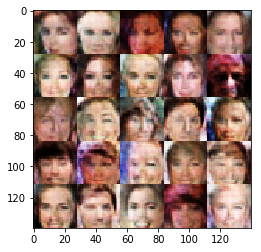

Epoch 1/1... Batch 2910... Discriminator Loss: 1.1139... Generator Loss: 0.8475
Epoch 1/1... Batch 2920... Discriminator Loss: 0.9596... Generator Loss: 0.9819
Epoch 1/1... Batch 2930... Discriminator Loss: 0.8524... Generator Loss: 1.1181
Epoch 1/1... Batch 2940... Discriminator Loss: 1.1784... Generator Loss: 1.3179
Epoch 1/1... Batch 2950... Discriminator Loss: 0.7260... Generator Loss: 1.8336
Epoch 1/1... Batch 2960... Discriminator Loss: 1.0154... Generator Loss: 0.7191
Epoch 1/1... Batch 2970... Discriminator Loss: 0.9833... Generator Loss: 0.8241
Epoch 1/1... Batch 2980... Discriminator Loss: 0.8804... Generator Loss: 0.9467
Epoch 1/1... Batch 2990... Discriminator Loss: 1.2350... Generator Loss: 0.6852
Epoch 1/1... Batch 3000... Discriminator Loss: 0.8387... Generator Loss: 1.3016


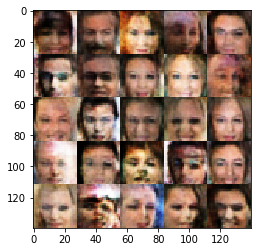

Epoch 1/1... Batch 3010... Discriminator Loss: 0.9690... Generator Loss: 0.8920
Epoch 1/1... Batch 3020... Discriminator Loss: 0.9484... Generator Loss: 1.3015
Epoch 1/1... Batch 3030... Discriminator Loss: 1.0008... Generator Loss: 0.9446
Epoch 1/1... Batch 3040... Discriminator Loss: 1.5374... Generator Loss: 0.3211
Epoch 1/1... Batch 3050... Discriminator Loss: 1.2406... Generator Loss: 0.5385
Epoch 1/1... Batch 3060... Discriminator Loss: 1.0889... Generator Loss: 0.5806
Epoch 1/1... Batch 3070... Discriminator Loss: 1.1525... Generator Loss: 0.6301
Epoch 1/1... Batch 3080... Discriminator Loss: 1.0246... Generator Loss: 1.1173
Epoch 1/1... Batch 3090... Discriminator Loss: 1.2925... Generator Loss: 0.4527
Epoch 1/1... Batch 3100... Discriminator Loss: 1.2118... Generator Loss: 0.5989


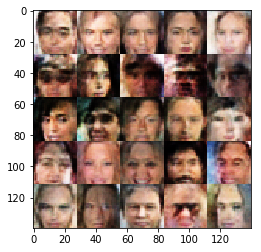

Epoch 1/1... Batch 3110... Discriminator Loss: 1.0599... Generator Loss: 0.6994
Epoch 1/1... Batch 3120... Discriminator Loss: 1.2886... Generator Loss: 0.4699
Epoch 1/1... Batch 3130... Discriminator Loss: 0.9252... Generator Loss: 0.9386
Epoch 1/1... Batch 3140... Discriminator Loss: 0.9262... Generator Loss: 0.9007
Epoch 1/1... Batch 3150... Discriminator Loss: 1.0507... Generator Loss: 0.9657
Epoch 1/1... Batch 3160... Discriminator Loss: 0.8284... Generator Loss: 0.8156
Epoch 1/1... Batch 3170... Discriminator Loss: 1.1952... Generator Loss: 0.5895
Epoch 1/1... Batch 3180... Discriminator Loss: 1.4165... Generator Loss: 0.3914
Epoch 1/1... Batch 3190... Discriminator Loss: 0.9616... Generator Loss: 1.1526
Epoch 1/1... Batch 3200... Discriminator Loss: 0.9866... Generator Loss: 0.9183


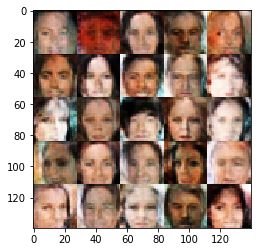

Epoch 1/1... Batch 3210... Discriminator Loss: 1.0877... Generator Loss: 1.1725
Epoch 1/1... Batch 3220... Discriminator Loss: 1.0544... Generator Loss: 1.6295
Epoch 1/1... Batch 3230... Discriminator Loss: 1.0815... Generator Loss: 0.6470
Epoch 1/1... Batch 3240... Discriminator Loss: 1.2896... Generator Loss: 0.4251
Epoch 1/1... Batch 3250... Discriminator Loss: 1.4340... Generator Loss: 0.4037
Epoch 1/1... Batch 3260... Discriminator Loss: 1.4570... Generator Loss: 0.4155
Epoch 1/1... Batch 3270... Discriminator Loss: 1.0634... Generator Loss: 0.6650
Epoch 1/1... Batch 3280... Discriminator Loss: 1.1664... Generator Loss: 0.6057
Epoch 1/1... Batch 3290... Discriminator Loss: 1.1561... Generator Loss: 0.5580
Epoch 1/1... Batch 3300... Discriminator Loss: 1.6050... Generator Loss: 0.2998


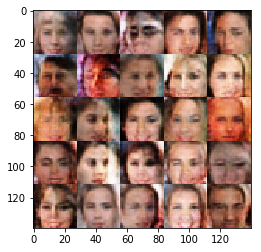

Epoch 1/1... Batch 3310... Discriminator Loss: 1.8144... Generator Loss: 0.2201
Epoch 1/1... Batch 3320... Discriminator Loss: 0.9416... Generator Loss: 0.9366
Epoch 1/1... Batch 3330... Discriminator Loss: 1.0906... Generator Loss: 0.9846
Epoch 1/1... Batch 3340... Discriminator Loss: 1.1865... Generator Loss: 0.5725
Epoch 1/1... Batch 3350... Discriminator Loss: 0.9630... Generator Loss: 1.1061
Epoch 1/1... Batch 3360... Discriminator Loss: 1.2677... Generator Loss: 0.5157
Epoch 1/1... Batch 3370... Discriminator Loss: 1.0709... Generator Loss: 0.9345
Epoch 1/1... Batch 3380... Discriminator Loss: 0.9893... Generator Loss: 0.6413
Epoch 1/1... Batch 3390... Discriminator Loss: 0.9440... Generator Loss: 0.9430
Epoch 1/1... Batch 3400... Discriminator Loss: 1.1927... Generator Loss: 1.6581


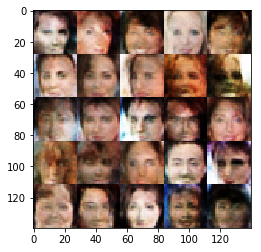

Epoch 1/1... Batch 3410... Discriminator Loss: 1.0555... Generator Loss: 1.2154
Epoch 1/1... Batch 3420... Discriminator Loss: 1.2067... Generator Loss: 0.6722
Epoch 1/1... Batch 3430... Discriminator Loss: 1.1360... Generator Loss: 1.0323
Epoch 1/1... Batch 3440... Discriminator Loss: 1.1244... Generator Loss: 0.6343
Epoch 1/1... Batch 3450... Discriminator Loss: 1.1464... Generator Loss: 0.8585
Epoch 1/1... Batch 3460... Discriminator Loss: 1.1650... Generator Loss: 0.5375
Epoch 1/1... Batch 3470... Discriminator Loss: 1.4343... Generator Loss: 0.3655
Epoch 1/1... Batch 3480... Discriminator Loss: 1.1542... Generator Loss: 0.6587
Epoch 1/1... Batch 3490... Discriminator Loss: 1.1892... Generator Loss: 0.5104
Epoch 1/1... Batch 3500... Discriminator Loss: 1.1798... Generator Loss: 0.6191


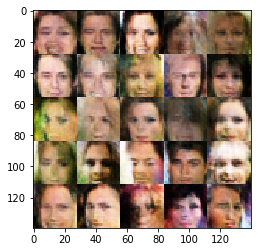

Epoch 1/1... Batch 3510... Discriminator Loss: 1.1116... Generator Loss: 1.0983
Epoch 1/1... Batch 3520... Discriminator Loss: 0.8502... Generator Loss: 1.0391
Epoch 1/1... Batch 3530... Discriminator Loss: 1.2429... Generator Loss: 0.5022
Epoch 1/1... Batch 3540... Discriminator Loss: 1.1699... Generator Loss: 0.5933
Epoch 1/1... Batch 3550... Discriminator Loss: 1.5349... Generator Loss: 0.6154
Epoch 1/1... Batch 3560... Discriminator Loss: 0.9759... Generator Loss: 0.8444
Epoch 1/1... Batch 3570... Discriminator Loss: 1.1565... Generator Loss: 0.6342
Epoch 1/1... Batch 3580... Discriminator Loss: 1.5146... Generator Loss: 0.3119
Epoch 1/1... Batch 3590... Discriminator Loss: 1.0023... Generator Loss: 0.9030
Epoch 1/1... Batch 3600... Discriminator Loss: 1.6195... Generator Loss: 0.3018


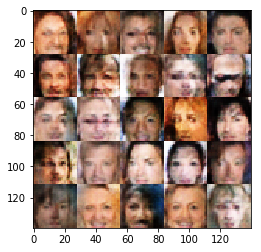

Epoch 1/1... Batch 3610... Discriminator Loss: 0.9705... Generator Loss: 1.1151
Epoch 1/1... Batch 3620... Discriminator Loss: 0.8673... Generator Loss: 1.4409
Epoch 1/1... Batch 3630... Discriminator Loss: 1.2019... Generator Loss: 0.5329
Epoch 1/1... Batch 3640... Discriminator Loss: 1.2006... Generator Loss: 0.5799
Epoch 1/1... Batch 3650... Discriminator Loss: 1.0113... Generator Loss: 1.1950
Epoch 1/1... Batch 3660... Discriminator Loss: 0.9989... Generator Loss: 0.7700
Epoch 1/1... Batch 3670... Discriminator Loss: 1.0084... Generator Loss: 0.6872
Epoch 1/1... Batch 3680... Discriminator Loss: 1.2050... Generator Loss: 0.6376
Epoch 1/1... Batch 3690... Discriminator Loss: 1.2885... Generator Loss: 0.4394
Epoch 1/1... Batch 3700... Discriminator Loss: 0.9873... Generator Loss: 1.1187


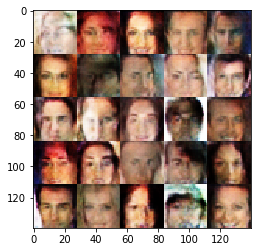

Epoch 1/1... Batch 3710... Discriminator Loss: 1.7694... Generator Loss: 0.2252
Epoch 1/1... Batch 3720... Discriminator Loss: 1.0725... Generator Loss: 1.0175
Epoch 1/1... Batch 3730... Discriminator Loss: 0.9947... Generator Loss: 0.8376
Epoch 1/1... Batch 3740... Discriminator Loss: 0.9880... Generator Loss: 0.9805
Epoch 1/1... Batch 3750... Discriminator Loss: 1.1482... Generator Loss: 1.0855
Epoch 1/1... Batch 3760... Discriminator Loss: 0.8583... Generator Loss: 0.9789
Epoch 1/1... Batch 3770... Discriminator Loss: 1.1586... Generator Loss: 1.0113
Epoch 1/1... Batch 3780... Discriminator Loss: 1.0119... Generator Loss: 1.4980
Epoch 1/1... Batch 3790... Discriminator Loss: 1.3545... Generator Loss: 0.4144
Epoch 1/1... Batch 3800... Discriminator Loss: 1.2732... Generator Loss: 0.6879


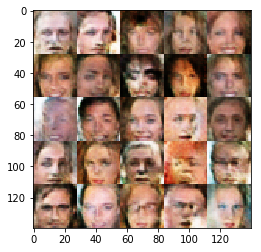

Epoch 1/1... Batch 3810... Discriminator Loss: 1.4639... Generator Loss: 0.3660
Epoch 1/1... Batch 3820... Discriminator Loss: 1.3441... Generator Loss: 0.7337
Epoch 1/1... Batch 3830... Discriminator Loss: 1.5762... Generator Loss: 0.2920
Epoch 1/1... Batch 3840... Discriminator Loss: 1.6542... Generator Loss: 0.2728
Epoch 1/1... Batch 3850... Discriminator Loss: 1.0891... Generator Loss: 1.0521
Epoch 1/1... Batch 3860... Discriminator Loss: 1.0513... Generator Loss: 0.9146
Epoch 1/1... Batch 3870... Discriminator Loss: 1.6714... Generator Loss: 0.2800
Epoch 1/1... Batch 3880... Discriminator Loss: 1.0910... Generator Loss: 0.6173
Epoch 1/1... Batch 3890... Discriminator Loss: 1.0384... Generator Loss: 0.8567
Epoch 1/1... Batch 3900... Discriminator Loss: 1.0715... Generator Loss: 1.2456


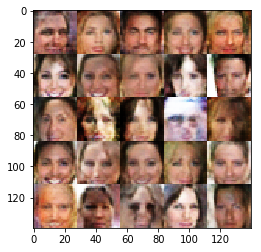

Epoch 1/1... Batch 3910... Discriminator Loss: 1.0084... Generator Loss: 1.1881
Epoch 1/1... Batch 3920... Discriminator Loss: 1.5508... Generator Loss: 0.3133
Epoch 1/1... Batch 3930... Discriminator Loss: 1.0774... Generator Loss: 1.3639
Epoch 1/1... Batch 3940... Discriminator Loss: 1.0292... Generator Loss: 0.9021
Epoch 1/1... Batch 3950... Discriminator Loss: 1.0603... Generator Loss: 0.6601
Epoch 1/1... Batch 3960... Discriminator Loss: 1.0892... Generator Loss: 0.7816
Epoch 1/1... Batch 3970... Discriminator Loss: 0.8383... Generator Loss: 0.9663
Epoch 1/1... Batch 3980... Discriminator Loss: 1.1607... Generator Loss: 0.5413
Epoch 1/1... Batch 3990... Discriminator Loss: 1.3094... Generator Loss: 0.4446
Epoch 1/1... Batch 4000... Discriminator Loss: 1.0110... Generator Loss: 0.8586


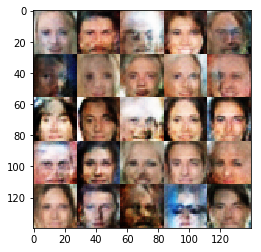

Epoch 1/1... Batch 4010... Discriminator Loss: 1.1823... Generator Loss: 0.5469
Epoch 1/1... Batch 4020... Discriminator Loss: 1.2248... Generator Loss: 0.8061
Epoch 1/1... Batch 4030... Discriminator Loss: 0.9182... Generator Loss: 0.8545
Epoch 1/1... Batch 4040... Discriminator Loss: 0.8866... Generator Loss: 0.8687
Epoch 1/1... Batch 4050... Discriminator Loss: 0.8347... Generator Loss: 1.1916
Epoch 1/1... Batch 4060... Discriminator Loss: 0.9527... Generator Loss: 1.0522
Epoch 1/1... Batch 4070... Discriminator Loss: 1.4375... Generator Loss: 0.5082
Epoch 1/1... Batch 4080... Discriminator Loss: 2.0125... Generator Loss: 0.1735
Epoch 1/1... Batch 4090... Discriminator Loss: 1.0638... Generator Loss: 1.2597
Epoch 1/1... Batch 4100... Discriminator Loss: 1.3009... Generator Loss: 0.5069


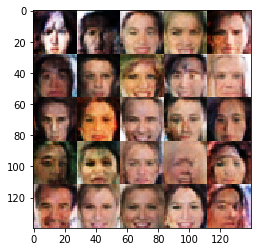

Epoch 1/1... Batch 4110... Discriminator Loss: 1.4236... Generator Loss: 0.3876
Epoch 1/1... Batch 4120... Discriminator Loss: 0.8158... Generator Loss: 1.0937
Epoch 1/1... Batch 4130... Discriminator Loss: 1.0218... Generator Loss: 0.8490
Epoch 1/1... Batch 4140... Discriminator Loss: 1.2596... Generator Loss: 0.5908
Epoch 1/1... Batch 4150... Discriminator Loss: 1.0585... Generator Loss: 0.8903
Epoch 1/1... Batch 4160... Discriminator Loss: 1.0118... Generator Loss: 0.6060
Epoch 1/1... Batch 4170... Discriminator Loss: 1.2756... Generator Loss: 0.4622
Epoch 1/1... Batch 4180... Discriminator Loss: 1.4349... Generator Loss: 0.3465
Epoch 1/1... Batch 4190... Discriminator Loss: 1.5237... Generator Loss: 0.4522
Epoch 1/1... Batch 4200... Discriminator Loss: 1.3310... Generator Loss: 0.4115


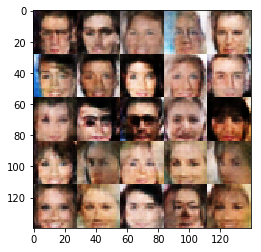

Epoch 1/1... Batch 4210... Discriminator Loss: 1.0634... Generator Loss: 1.1454
Epoch 1/1... Batch 4220... Discriminator Loss: 1.3967... Generator Loss: 0.5456
Epoch 1/1... Batch 4230... Discriminator Loss: 0.9639... Generator Loss: 1.0490
Epoch 1/1... Batch 4240... Discriminator Loss: 1.3133... Generator Loss: 1.0565
Epoch 1/1... Batch 4250... Discriminator Loss: 0.8816... Generator Loss: 0.9970
Epoch 1/1... Batch 4260... Discriminator Loss: 1.6766... Generator Loss: 0.2936
Epoch 1/1... Batch 4270... Discriminator Loss: 0.8489... Generator Loss: 1.1932
Epoch 1/1... Batch 4280... Discriminator Loss: 0.9388... Generator Loss: 1.1716
Epoch 1/1... Batch 4290... Discriminator Loss: 0.7868... Generator Loss: 1.0512
Epoch 1/1... Batch 4300... Discriminator Loss: 1.6388... Generator Loss: 0.2783


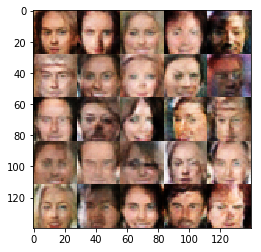

Epoch 1/1... Batch 4310... Discriminator Loss: 1.3107... Generator Loss: 0.4802
Epoch 1/1... Batch 4320... Discriminator Loss: 1.1395... Generator Loss: 0.6354
Epoch 1/1... Batch 4330... Discriminator Loss: 1.0566... Generator Loss: 0.9554
Epoch 1/1... Batch 4340... Discriminator Loss: 1.0389... Generator Loss: 0.9680
Epoch 1/1... Batch 4350... Discriminator Loss: 1.5005... Generator Loss: 0.4188
Epoch 1/1... Batch 4360... Discriminator Loss: 1.2548... Generator Loss: 0.8686
Epoch 1/1... Batch 4370... Discriminator Loss: 1.1440... Generator Loss: 1.1604
Epoch 1/1... Batch 4380... Discriminator Loss: 1.0917... Generator Loss: 0.7978
Epoch 1/1... Batch 4390... Discriminator Loss: 1.3257... Generator Loss: 1.3289
Epoch 1/1... Batch 4400... Discriminator Loss: 1.3330... Generator Loss: 0.4485


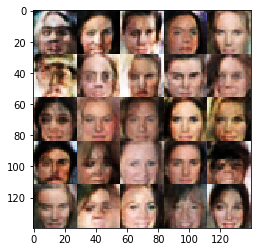

Epoch 1/1... Batch 4410... Discriminator Loss: 1.1251... Generator Loss: 0.7673
Epoch 1/1... Batch 4420... Discriminator Loss: 1.0144... Generator Loss: 1.0046
Epoch 1/1... Batch 4430... Discriminator Loss: 0.9615... Generator Loss: 1.0528
Epoch 1/1... Batch 4440... Discriminator Loss: 1.0595... Generator Loss: 0.6624
Epoch 1/1... Batch 4450... Discriminator Loss: 1.2937... Generator Loss: 0.5136
Epoch 1/1... Batch 4460... Discriminator Loss: 1.3285... Generator Loss: 0.4563
Epoch 1/1... Batch 4470... Discriminator Loss: 1.0541... Generator Loss: 0.8030
Epoch 1/1... Batch 4480... Discriminator Loss: 1.5911... Generator Loss: 0.2906
Epoch 1/1... Batch 4490... Discriminator Loss: 0.9916... Generator Loss: 1.7203
Epoch 1/1... Batch 4500... Discriminator Loss: 0.9523... Generator Loss: 0.8710


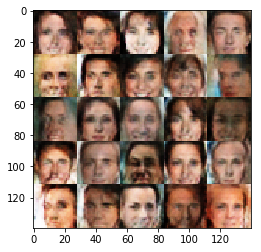

Epoch 1/1... Batch 4510... Discriminator Loss: 1.4064... Generator Loss: 0.3869
Epoch 1/1... Batch 4520... Discriminator Loss: 1.4156... Generator Loss: 0.4490
Epoch 1/1... Batch 4530... Discriminator Loss: 1.2048... Generator Loss: 0.7380
Epoch 1/1... Batch 4540... Discriminator Loss: 0.9728... Generator Loss: 0.8263
Epoch 1/1... Batch 4550... Discriminator Loss: 1.0941... Generator Loss: 1.1212
Epoch 1/1... Batch 4560... Discriminator Loss: 1.0751... Generator Loss: 0.8440
Epoch 1/1... Batch 4570... Discriminator Loss: 1.1469... Generator Loss: 1.4494
Epoch 1/1... Batch 4580... Discriminator Loss: 1.1557... Generator Loss: 1.0354
Epoch 1/1... Batch 4590... Discriminator Loss: 1.0551... Generator Loss: 0.7953
Epoch 1/1... Batch 4600... Discriminator Loss: 1.3777... Generator Loss: 0.6466


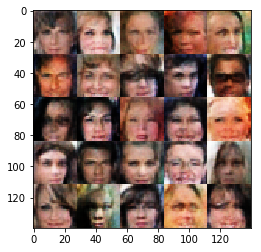

Epoch 1/1... Batch 4610... Discriminator Loss: 1.2528... Generator Loss: 0.5447
Epoch 1/1... Batch 4620... Discriminator Loss: 1.2691... Generator Loss: 0.8867
Epoch 1/1... Batch 4630... Discriminator Loss: 1.2327... Generator Loss: 0.4833
Epoch 1/1... Batch 4640... Discriminator Loss: 1.1698... Generator Loss: 0.5911
Epoch 1/1... Batch 4650... Discriminator Loss: 1.1314... Generator Loss: 1.2312
Epoch 1/1... Batch 4660... Discriminator Loss: 1.2648... Generator Loss: 0.7686
Epoch 1/1... Batch 4670... Discriminator Loss: 1.2561... Generator Loss: 0.5202
Epoch 1/1... Batch 4680... Discriminator Loss: 1.0138... Generator Loss: 1.6047
Epoch 1/1... Batch 4690... Discriminator Loss: 1.2292... Generator Loss: 0.8833
Epoch 1/1... Batch 4700... Discriminator Loss: 1.2172... Generator Loss: 0.8874


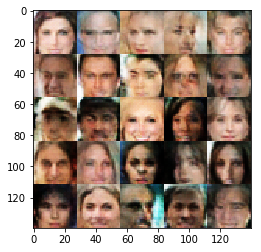

Epoch 1/1... Batch 4710... Discriminator Loss: 1.0364... Generator Loss: 0.6451
Epoch 1/1... Batch 4720... Discriminator Loss: 1.1001... Generator Loss: 1.2253
Epoch 1/1... Batch 4730... Discriminator Loss: 1.1280... Generator Loss: 0.6114
Epoch 1/1... Batch 4740... Discriminator Loss: 1.2222... Generator Loss: 1.7077
Epoch 1/1... Batch 4750... Discriminator Loss: 1.0634... Generator Loss: 0.8611
Epoch 1/1... Batch 4760... Discriminator Loss: 1.0540... Generator Loss: 1.3605
Epoch 1/1... Batch 4770... Discriminator Loss: 1.0647... Generator Loss: 0.7001
Epoch 1/1... Batch 4780... Discriminator Loss: 1.3255... Generator Loss: 0.4284
Epoch 1/1... Batch 4790... Discriminator Loss: 1.1029... Generator Loss: 0.8948
Epoch 1/1... Batch 4800... Discriminator Loss: 1.0661... Generator Loss: 0.9821


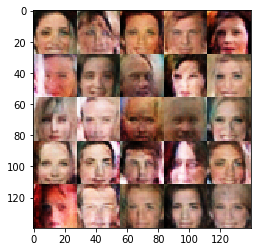

Epoch 1/1... Batch 4810... Discriminator Loss: 1.3626... Generator Loss: 0.3937
Epoch 1/1... Batch 4820... Discriminator Loss: 1.0032... Generator Loss: 1.2425
Epoch 1/1... Batch 4830... Discriminator Loss: 1.0728... Generator Loss: 1.1329
Epoch 1/1... Batch 4840... Discriminator Loss: 1.0000... Generator Loss: 0.6452
Epoch 1/1... Batch 4850... Discriminator Loss: 1.0360... Generator Loss: 0.7030
Epoch 1/1... Batch 4860... Discriminator Loss: 1.1155... Generator Loss: 0.9812
Epoch 1/1... Batch 4870... Discriminator Loss: 1.0110... Generator Loss: 0.9098
Epoch 1/1... Batch 4880... Discriminator Loss: 1.3032... Generator Loss: 1.1680
Epoch 1/1... Batch 4890... Discriminator Loss: 1.8778... Generator Loss: 1.6997
Epoch 1/1... Batch 4900... Discriminator Loss: 1.5336... Generator Loss: 0.3347


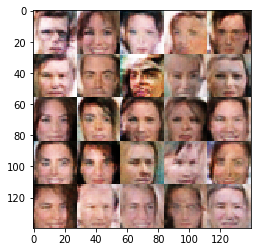

Epoch 1/1... Batch 4910... Discriminator Loss: 1.0186... Generator Loss: 0.9251
Epoch 1/1... Batch 4920... Discriminator Loss: 1.1388... Generator Loss: 0.9911
Epoch 1/1... Batch 4930... Discriminator Loss: 1.1164... Generator Loss: 1.4790
Epoch 1/1... Batch 4940... Discriminator Loss: 1.1168... Generator Loss: 0.7013
Epoch 1/1... Batch 4950... Discriminator Loss: 0.9949... Generator Loss: 0.8061
Epoch 1/1... Batch 4960... Discriminator Loss: 1.1236... Generator Loss: 0.7439
Epoch 1/1... Batch 4970... Discriminator Loss: 1.1985... Generator Loss: 0.5552
Epoch 1/1... Batch 4980... Discriminator Loss: 1.0016... Generator Loss: 0.7488
Epoch 1/1... Batch 4990... Discriminator Loss: 1.0204... Generator Loss: 1.5946
Epoch 1/1... Batch 5000... Discriminator Loss: 1.0653... Generator Loss: 0.9684


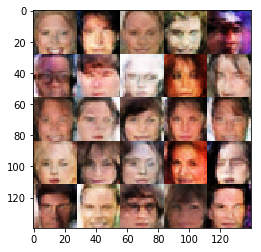

Epoch 1/1... Batch 5010... Discriminator Loss: 1.2124... Generator Loss: 0.8373
Epoch 1/1... Batch 5020... Discriminator Loss: 1.0726... Generator Loss: 0.7478
Epoch 1/1... Batch 5030... Discriminator Loss: 1.0448... Generator Loss: 0.7134
Epoch 1/1... Batch 5040... Discriminator Loss: 1.6076... Generator Loss: 0.2896
Epoch 1/1... Batch 5050... Discriminator Loss: 1.2128... Generator Loss: 0.6330
Epoch 1/1... Batch 5060... Discriminator Loss: 0.9354... Generator Loss: 1.2211
Epoch 1/1... Batch 5070... Discriminator Loss: 1.2435... Generator Loss: 0.4707
Epoch 1/1... Batch 5080... Discriminator Loss: 0.9962... Generator Loss: 1.3251
Epoch 1/1... Batch 5090... Discriminator Loss: 0.9574... Generator Loss: 0.9166
Epoch 1/1... Batch 5100... Discriminator Loss: 1.1679... Generator Loss: 0.5951


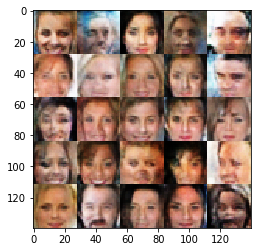

Epoch 1/1... Batch 5110... Discriminator Loss: 1.1857... Generator Loss: 0.8945
Epoch 1/1... Batch 5120... Discriminator Loss: 1.1414... Generator Loss: 0.8916
Epoch 1/1... Batch 5130... Discriminator Loss: 1.0175... Generator Loss: 0.6993
Epoch 1/1... Batch 5140... Discriminator Loss: 1.4595... Generator Loss: 0.3477
Epoch 1/1... Batch 5150... Discriminator Loss: 1.0935... Generator Loss: 0.6899
Epoch 1/1... Batch 5160... Discriminator Loss: 1.3429... Generator Loss: 0.4754
Epoch 1/1... Batch 5170... Discriminator Loss: 1.1315... Generator Loss: 1.1982
Epoch 1/1... Batch 5180... Discriminator Loss: 1.2046... Generator Loss: 1.0374
Epoch 1/1... Batch 5190... Discriminator Loss: 1.1544... Generator Loss: 1.2933
Epoch 1/1... Batch 5200... Discriminator Loss: 0.9240... Generator Loss: 0.9174


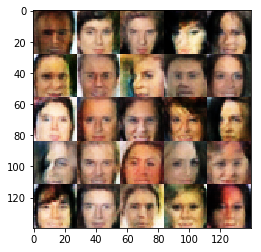

Epoch 1/1... Batch 5210... Discriminator Loss: 1.1970... Generator Loss: 1.0829
Epoch 1/1... Batch 5220... Discriminator Loss: 1.0190... Generator Loss: 0.9115
Epoch 1/1... Batch 5230... Discriminator Loss: 1.2364... Generator Loss: 0.4868
Epoch 1/1... Batch 5240... Discriminator Loss: 0.7949... Generator Loss: 1.1177
Epoch 1/1... Batch 5250... Discriminator Loss: 1.6428... Generator Loss: 1.4620
Epoch 1/1... Batch 5260... Discriminator Loss: 0.8051... Generator Loss: 0.9239
Epoch 1/1... Batch 5270... Discriminator Loss: 1.2128... Generator Loss: 0.8728
Epoch 1/1... Batch 5280... Discriminator Loss: 1.4685... Generator Loss: 0.3504
Epoch 1/1... Batch 5290... Discriminator Loss: 1.0206... Generator Loss: 0.5962
Epoch 1/1... Batch 5300... Discriminator Loss: 1.1191... Generator Loss: 0.9557


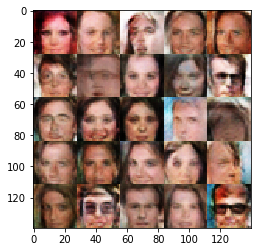

Epoch 1/1... Batch 5310... Discriminator Loss: 0.9446... Generator Loss: 1.3367
Epoch 1/1... Batch 5320... Discriminator Loss: 1.0216... Generator Loss: 1.4417
Epoch 1/1... Batch 5330... Discriminator Loss: 1.3276... Generator Loss: 0.4688
Epoch 1/1... Batch 5340... Discriminator Loss: 1.4861... Generator Loss: 1.5013
Epoch 1/1... Batch 5350... Discriminator Loss: 1.2036... Generator Loss: 0.4876
Epoch 1/1... Batch 5360... Discriminator Loss: 1.1104... Generator Loss: 0.5686
Epoch 1/1... Batch 5370... Discriminator Loss: 1.5718... Generator Loss: 0.2832
Epoch 1/1... Batch 5380... Discriminator Loss: 1.3808... Generator Loss: 0.3874
Epoch 1/1... Batch 5390... Discriminator Loss: 1.0008... Generator Loss: 1.0756
Epoch 1/1... Batch 5400... Discriminator Loss: 1.4446... Generator Loss: 0.3862


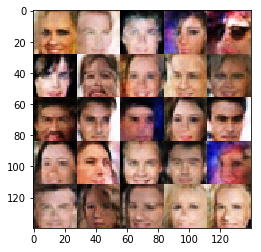

Epoch 1/1... Batch 5410... Discriminator Loss: 1.3818... Generator Loss: 0.3995
Epoch 1/1... Batch 5420... Discriminator Loss: 1.2758... Generator Loss: 0.4896
Epoch 1/1... Batch 5430... Discriminator Loss: 1.0388... Generator Loss: 0.9608
Epoch 1/1... Batch 5440... Discriminator Loss: 1.0480... Generator Loss: 0.8560
Epoch 1/1... Batch 5450... Discriminator Loss: 1.1624... Generator Loss: 0.6728
Epoch 1/1... Batch 5460... Discriminator Loss: 1.5247... Generator Loss: 0.2828
Epoch 1/1... Batch 5470... Discriminator Loss: 1.1771... Generator Loss: 0.6078
Epoch 1/1... Batch 5480... Discriminator Loss: 1.4067... Generator Loss: 0.3700
Epoch 1/1... Batch 5490... Discriminator Loss: 1.1378... Generator Loss: 0.7773
Epoch 1/1... Batch 5500... Discriminator Loss: 1.0780... Generator Loss: 1.1670


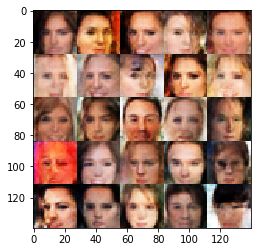

Epoch 1/1... Batch 5510... Discriminator Loss: 1.4378... Generator Loss: 0.3511
Epoch 1/1... Batch 5520... Discriminator Loss: 1.6784... Generator Loss: 0.2944
Epoch 1/1... Batch 5530... Discriminator Loss: 1.2374... Generator Loss: 0.4789
Epoch 1/1... Batch 5540... Discriminator Loss: 1.1490... Generator Loss: 0.7449
Epoch 1/1... Batch 5550... Discriminator Loss: 0.7915... Generator Loss: 1.1665
Epoch 1/1... Batch 5560... Discriminator Loss: 1.1188... Generator Loss: 0.6591
Epoch 1/1... Batch 5570... Discriminator Loss: 1.2017... Generator Loss: 1.1564
Epoch 1/1... Batch 5580... Discriminator Loss: 1.1315... Generator Loss: 0.6484
Epoch 1/1... Batch 5590... Discriminator Loss: 1.0099... Generator Loss: 0.6691
Epoch 1/1... Batch 5600... Discriminator Loss: 1.1306... Generator Loss: 0.7827


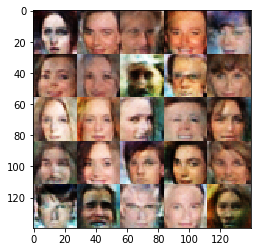

Epoch 1/1... Batch 5610... Discriminator Loss: 1.2181... Generator Loss: 0.4845
Epoch 1/1... Batch 5620... Discriminator Loss: 1.2993... Generator Loss: 0.5178
Epoch 1/1... Batch 5630... Discriminator Loss: 1.2813... Generator Loss: 0.4892
Epoch 1/1... Batch 5640... Discriminator Loss: 1.4052... Generator Loss: 1.3989
Epoch 1/1... Batch 5650... Discriminator Loss: 1.2234... Generator Loss: 0.5465
Epoch 1/1... Batch 5660... Discriminator Loss: 1.0254... Generator Loss: 1.0268
Epoch 1/1... Batch 5670... Discriminator Loss: 1.1277... Generator Loss: 0.9336
Epoch 1/1... Batch 5680... Discriminator Loss: 1.2135... Generator Loss: 0.4609
Epoch 1/1... Batch 5690... Discriminator Loss: 1.1909... Generator Loss: 0.8836
Epoch 1/1... Batch 5700... Discriminator Loss: 1.0897... Generator Loss: 0.6088


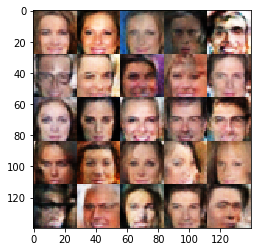

Epoch 1/1... Batch 5710... Discriminator Loss: 1.0500... Generator Loss: 0.8440
Epoch 1/1... Batch 5720... Discriminator Loss: 1.2564... Generator Loss: 0.4785
Epoch 1/1... Batch 5730... Discriminator Loss: 0.9468... Generator Loss: 0.7637
Epoch 1/1... Batch 5740... Discriminator Loss: 0.9414... Generator Loss: 0.8353
Epoch 1/1... Batch 5750... Discriminator Loss: 0.9178... Generator Loss: 0.7949
Epoch 1/1... Batch 5760... Discriminator Loss: 1.0624... Generator Loss: 0.6925
Epoch 1/1... Batch 5770... Discriminator Loss: 0.9010... Generator Loss: 1.0607
Epoch 1/1... Batch 5780... Discriminator Loss: 1.0114... Generator Loss: 0.7783
Epoch 1/1... Batch 5790... Discriminator Loss: 0.9098... Generator Loss: 1.0094
Epoch 1/1... Batch 5800... Discriminator Loss: 0.9880... Generator Loss: 0.7406


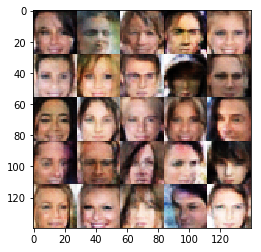

Epoch 1/1... Batch 5810... Discriminator Loss: 1.3852... Generator Loss: 0.4123
Epoch 1/1... Batch 5820... Discriminator Loss: 1.0762... Generator Loss: 0.7392
Epoch 1/1... Batch 5830... Discriminator Loss: 1.0451... Generator Loss: 0.7736
Epoch 1/1... Batch 5840... Discriminator Loss: 1.2969... Generator Loss: 0.3962
Epoch 1/1... Batch 5850... Discriminator Loss: 1.5106... Generator Loss: 1.2604
Epoch 1/1... Batch 5860... Discriminator Loss: 1.4091... Generator Loss: 0.3647
Epoch 1/1... Batch 5870... Discriminator Loss: 1.2056... Generator Loss: 0.6031
Epoch 1/1... Batch 5880... Discriminator Loss: 0.7734... Generator Loss: 1.0446
Epoch 1/1... Batch 5890... Discriminator Loss: 1.4157... Generator Loss: 0.4241
Epoch 1/1... Batch 5900... Discriminator Loss: 1.0634... Generator Loss: 0.9692


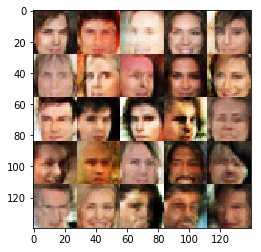

Epoch 1/1... Batch 5910... Discriminator Loss: 1.0970... Generator Loss: 0.8037
Epoch 1/1... Batch 5920... Discriminator Loss: 1.0253... Generator Loss: 0.8561
Epoch 1/1... Batch 5930... Discriminator Loss: 1.1965... Generator Loss: 0.6572
Epoch 1/1... Batch 5940... Discriminator Loss: 1.3752... Generator Loss: 1.0000
Epoch 1/1... Batch 5950... Discriminator Loss: 1.0224... Generator Loss: 0.7001
Epoch 1/1... Batch 5960... Discriminator Loss: 1.4989... Generator Loss: 0.3406
Epoch 1/1... Batch 5970... Discriminator Loss: 1.0087... Generator Loss: 1.0397
Epoch 1/1... Batch 5980... Discriminator Loss: 1.2464... Generator Loss: 0.4845
Epoch 1/1... Batch 5990... Discriminator Loss: 1.0830... Generator Loss: 0.5966
Epoch 1/1... Batch 6000... Discriminator Loss: 1.5265... Generator Loss: 2.0764


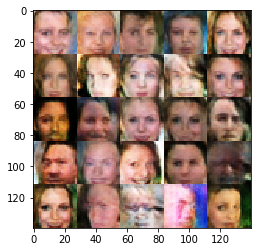

Epoch 1/1... Batch 6010... Discriminator Loss: 1.1790... Generator Loss: 0.5868
Epoch 1/1... Batch 6020... Discriminator Loss: 0.8796... Generator Loss: 0.8824
Epoch 1/1... Batch 6030... Discriminator Loss: 1.0533... Generator Loss: 0.8869
Epoch 1/1... Batch 6040... Discriminator Loss: 1.1332... Generator Loss: 1.1462
Epoch 1/1... Batch 6050... Discriminator Loss: 1.3197... Generator Loss: 0.4343
Epoch 1/1... Batch 6060... Discriminator Loss: 1.0050... Generator Loss: 0.9696
Epoch 1/1... Batch 6070... Discriminator Loss: 1.2356... Generator Loss: 0.5974
Epoch 1/1... Batch 6080... Discriminator Loss: 1.1207... Generator Loss: 1.1644
Epoch 1/1... Batch 6090... Discriminator Loss: 1.0520... Generator Loss: 0.6681
Epoch 1/1... Batch 6100... Discriminator Loss: 1.2888... Generator Loss: 1.5087


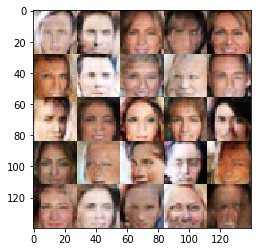

Epoch 1/1... Batch 6110... Discriminator Loss: 1.1585... Generator Loss: 0.8316
Epoch 1/1... Batch 6120... Discriminator Loss: 1.2639... Generator Loss: 0.5035
Epoch 1/1... Batch 6130... Discriminator Loss: 1.1674... Generator Loss: 0.8716
Epoch 1/1... Batch 6140... Discriminator Loss: 0.9843... Generator Loss: 1.0100
Epoch 1/1... Batch 6150... Discriminator Loss: 0.9508... Generator Loss: 0.9604
Epoch 1/1... Batch 6160... Discriminator Loss: 0.8493... Generator Loss: 0.9437
Epoch 1/1... Batch 6170... Discriminator Loss: 1.0651... Generator Loss: 0.7960
Epoch 1/1... Batch 6180... Discriminator Loss: 1.1330... Generator Loss: 0.5859
Epoch 1/1... Batch 6190... Discriminator Loss: 1.1312... Generator Loss: 0.6144
Epoch 1/1... Batch 6200... Discriminator Loss: 0.9818... Generator Loss: 1.0476


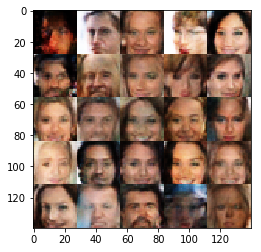

Epoch 1/1... Batch 6210... Discriminator Loss: 1.2987... Generator Loss: 0.4233
Epoch 1/1... Batch 6220... Discriminator Loss: 0.9549... Generator Loss: 1.3589
Epoch 1/1... Batch 6230... Discriminator Loss: 1.7784... Generator Loss: 0.2706
Epoch 1/1... Batch 6240... Discriminator Loss: 0.8930... Generator Loss: 1.0811
Epoch 1/1... Batch 6250... Discriminator Loss: 1.4226... Generator Loss: 0.6291
Epoch 1/1... Batch 6260... Discriminator Loss: 1.1656... Generator Loss: 0.7475
Epoch 1/1... Batch 6270... Discriminator Loss: 1.1043... Generator Loss: 1.6619
Epoch 1/1... Batch 6280... Discriminator Loss: 1.2269... Generator Loss: 0.8272
Epoch 1/1... Batch 6290... Discriminator Loss: 1.2066... Generator Loss: 0.8573
Epoch 1/1... Batch 6300... Discriminator Loss: 1.5737... Generator Loss: 0.3122


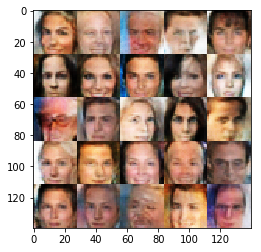

Epoch 1/1... Batch 6310... Discriminator Loss: 1.3498... Generator Loss: 0.4752
Epoch 1/1... Batch 6320... Discriminator Loss: 1.0454... Generator Loss: 0.7067
Epoch 1/1... Batch 6330... Discriminator Loss: 1.4267... Generator Loss: 0.3698


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.4



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.